In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# loading dataset
pdr_locations = pd.read_csv(r'C:\Users\Камила\Big_data\charging_stations\dataset\full\pdr_locations.csv')

In [3]:
# look at first 3 rows
pdr_locations.head(3)

,connector_id,connector_station_id,connector_evse_id,connector_connector_status_id,connector_status,connector_uid,station_id,station_uid,station_name,station_address,...,totSessionsNotLocal,totSessionsLocal,totCost,totHouseSessions,totPublicSessions,totPublicCost,totHouseCost,totHouseEnergy,totPublicEnergy,connector_isSuspended
0,462849,385079,IT*F2X*EF2XITA2151*1,1,AVAILABLE,6ea4dcd0-6678-4585-8b8d-41ea3a1cee39,385079,fe01af77-ad39-4ad9-80bf-322d7c02a4a9,Area di Servizio - Arda Ovest,A1 - Autostrada del Sole,...,198,0,2312.77,0,201,2312.77,0,0,4195.081,NaN
1,462850,385079,IT*F2X*EF2XITA2151*2,1,AVAILABLE,826d0eaa-0de0-4aa4-b65e-5db33380c57a,385079,fe01af77-ad39-4ad9-80bf-322d7c02a4a9,Area di Servizio - Arda Ovest,A1 - Autostrada del Sole,...,79,0,700.40,0,80,700.40,0,0,1273.441,NaN
2,462851,385079,IT*F2X*EF2XITA2151*3,1,AVAILABLE,bdb4f814-1754-402e-91fc-ab020f180e1a,385079,fe01af77-ad39-4ad9-80bf-322d7c02a4a9,Area di Servizio - Arda Ovest,A1 - Autostrada del Sole,...,289,0,944.33,0,297,944.33,0,0,2097.308,NaN


In [6]:
# CHECKING FOR THE DATETIME FOR UNIQUE STATIONS

# Convert 'station_installation_date' to datetime format, forcing invalid entries to NaT
#pdr_locations['station_installation_date'] = pd.to_datetime(pdr_locations['station_installation_date'], errors='coerce')

# Check if there are any NaT values after the conversion
#print(pdr_locations['station_installation_date'].isna().sum())

# Inspect rows where the conversion failed (rows with NaT)
#print(pdr_locations[pdr_locations['station_installation_date'].isna()].head())


In [7]:
# CHECKING THE NUMBER OF UNIQUE STATIONS BUILT IN 2022.

# Filter for stations installed in 2022
#stations_2022 = pdr_locations[pdr_locations['station_installation_date'].dt.year == 2022]

# Count the number of unique stations (connector_station_id)
#num_stations_2022 = stations_2022['station_id'].nunique()

# Display the result
#print(f"Number of unique charging stations installed in 2022: {num_stations_2022}")


### Inspecting dataset

In [4]:
# number of rows, columns
pdr_locations.shape

(830, 144)

In [5]:
# look at the general statistics
pdr_locations.describe()

,connector_id,connector_station_id,connector_connector_status_id,station_id,station_street_number,station_postal_code,station_coordinates_lat,station_coordinates_lon,station_directions,station_time_zone,...,totSessions,totSessionsNotLocal,totSessionsLocal,totCost,totHouseSessions,totPublicSessions,totPublicCost,totHouseCost,totHouseEnergy,totPublicEnergy
count,8.300000e+02,8.300000e+02,830.000000,8.300000e+02,0.0,830.000000,830.000000,830.000000,0.0,0.0,...,830.000000,830.000000,830.000000,830.000000,830.0,830.000000,830.000000,830.0,830.0,830.000000
mean,9.240990e+05,6.863694e+05,1.151807,6.863694e+05,NaN,36763.586747,43.772645,11.679412,NaN,NaN,...,465.036145,454.827711,0.002410,9467.685855,0.0,465.036145,9467.685855,0.0,0.0,14006.847572
std,3.095176e+05,2.529324e+05,0.873737,2.529324e+05,NaN,24449.650843,1.605664,2.172102,NaN,NaN,...,490.645257,480.294118,0.049058,10802.687982,0.0,490.645257,10802.687982,0.0,0.0,15775.476469
min,4.187280e+05,3.691160e+05,1.000000,3.691160e+05,NaN,10.000000,40.837613,8.440903,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000
25%,6.250482e+05,4.446590e+05,1.000000,4.446590e+05,NaN,20026.000000,42.200472,9.393760,NaN,NaN,...,79.000000,77.000000,0.000000,584.035000,0.0,79.000000,584.035000,0.0,0.0,1134.687000
50%,9.743725e+05,5.807380e+05,1.000000,5.807380e+05,NaN,33010.000000,44.392512,11.570791,NaN,NaN,...,283.500000,276.500000,0.000000,5360.650000,0.0,283.500000,5360.650000,0.0,0.0,7879.400000
75%,1.167045e+06,9.524130e+05,1.000000,9.524130e+05,NaN,52041.000000,45.074900,13.334975,NaN,NaN,...,729.750000,715.750000,0.000000,15833.222500,0.0,729.750000,15833.222500,0.0,0.0,23273.082000
max,1.413007e+06,1.033694e+06,9.000000,1.033694e+06,NaN,83100.000000,46.499013,16.769807,NaN,NaN,...,3062.000000,2981.000000,1.000000,64974.670000,0.0,3062.000000,64974.670000,0.0,0.0,95445.220000


### Handling missing values

In [6]:
# check for columns with missing values
missing_data = pdr_locations.isnull().sum().sort_values(ascending=False)
missing_data

station_owner_company_parent_company_id    830
station_owner_company_user_id              830
station_owner_company_deadline             830
station_owner_company_id_offer             830
station_owner_company_pin_color            830
                                          ... 
station_is_qr_private_enable                 0
station_owner_company_id                     0
station_is_visible                           0
station_owner_company_uid                    0
connector_id                                 0
Length: 144, dtype: int64

In [8]:
# check duplications
pdr_locations.duplicated().sum()

0

we know that there are 830 rows overall in the dataset, and I will drop the columns that have all these rows empty.

In [9]:
# first, i want to count the number of these empty columns
num_empty_columns = len(pdr_locations.columns[pdr_locations.isnull().sum() == len(pdr_locations)])
num_empty_columns

50

In [10]:
# from above i know that there are 50 empty columns, i will drop them. 
columns_to_drop = pdr_locations.columns[pdr_locations.isnull().sum() == len(pdr_locations)]

In [11]:
pdr_locations = pdr_locations.drop(columns=columns_to_drop)
pdr_locations.shape

(830, 94)

In [12]:
# check for columns with missing values
missing_data = pdr_locations.isnull().sum().sort_values(ascending=False)
missing_data

connector_isSuspended                                819
station_commissioning_date                           545
station_installation_date                            122
station_serial_number                                 79
station_firmware                                      79
                                                    ... 
station_owner_company_description_en                   0
station_owner_company_imported                         0
station_owner_company_eMI3_id                          0
station_owner_company_name                             0
station_owner_company_stripe_onboarding_status_id      0
Length: 94, dtype: int64

as there are 830 rows, 50% of them will be 415. so i will drop columns that have more than 50% empty rows.

In [13]:
pdr_locations = pdr_locations.dropna(axis=1, thresh=len(pdr_locations) * 0.5)

In [14]:
pdr_locations.shape

(830, 92)

In [15]:
# displaying more rows of missing data
pd.set_option('display.max_rows', None)

# check for columns with missing values
missing_data = pdr_locations.isnull().sum().sort_values(ascending=False)
missing_data

station_installation_date                            122
station_serial_number                                 79
station_firmware                                      79
station_model                                         79
station_brand                                         79
station_type_status                                    2
connector_id                                           0
station_owner_company_is_lifestyle                     0
station_owner_company_show_map                         0
station_owner_company_show_roaming                     0
station_owner_company_show_advanced_services           0
station_owner_company_emp_services                     0
station_owner_company_is_dealer                        0
station_owner_company_is_evfleet                       0
station_owner_company_pre_authorization_amount         0
station_owner_company_is_subcpo                        0
station_owner_company_show_emp_cost                    0
station_owner_company_blacklist

In [16]:
# i'm gonna focus only on missing valued columns
missing_columns = missing_data[missing_data > 0]
missing_columns

station_installation_date    122
station_serial_number         79
station_firmware              79
station_model                 79
station_brand                 79
station_type_status            2
dtype: int64

looking at the columns that have 70 missing rows, i want to check if they are consistent across these 4 columns:

In [20]:
# identifying 4 columns with 79 missing values
columns_with_79_missing = ['station_serial_number', 'station_firmware', 'station_model', 'station_brand']

# check if the missing values are consistent across these columns
missing_in_consistent_rows = pdr_locations[columns_with_79_missing].isnull().all(axis=1)

# filter rows where all 4 columns have missing values
consistent_missing_rows = pdr_locations[missing_in_consistent_rows]
consistent_missing_rows


,connector_id,connector_station_id,connector_evse_id,connector_connector_status_id,connector_status,connector_uid,station_id,station_uid,station_name,station_address,...,totSessions,totSessionsNotLocal,totSessionsLocal,totCost,totHouseSessions,totPublicSessions,totPublicCost,totHouseCost,totHouseEnergy,totPublicEnergy
227,1354231,1014238,IT*F2X*EF2XITN0503*1,1,AVAILABLE,1a7287c9-0f0b-4654-960e-6ec56fb8b643,1014238,04882182-c137-4a85-a111-e4483778830a,Area di Servizio - Pioppa Est,A14 - Autostrada Adriatica,...,286,282,0,6267.37,0,286,6267.37,0,0,9246.347
240,1354243,1014240,IT*F2X*EF2XITN0603*1,1,AVAILABLE,bf44bc3a-391a-4082-b4dd-48e1a777c9e4,1014240,17ade594-87f5-4b32-a310-a0b9c6353810,Area di Servizio - Pioppa Ovest,Autostrada Adriatica,...,6,1,0,112.53,0,6,112.53,0,0,165.051
241,1354244,1014240,IT*F2X*EF2XITN0603*2,1,AVAILABLE,dd6554d9-e656-4a14-8b8a-0290d5037d9e,1014240,17ade594-87f5-4b32-a310-a0b9c6353810,Area di Servizio - Pioppa Ovest,Autostrada Adriatica,...,5,0,0,123.59,0,5,123.59,0,0,181.738
242,1354245,1014241,IT*F2X*EF2XITN0604*1,1,AVAILABLE,b91b72ab-72b0-4f61-927d-273a6b0071f4,1014241,b34b5430-d408-4af0-b7e5-9d4eab33ff7a,Area di Servizio - Pioppa Ovest,Autostrada Adriatica,...,7,1,0,139.91,0,7,139.91,0,0,205.753
243,1354246,1014241,IT*F2X*EF2XITN0604*2,1,AVAILABLE,7af3ec60-6c44-445e-a846-706185ce980f,1014241,b34b5430-d408-4af0-b7e5-9d4eab33ff7a,Area di Servizio - Pioppa Ovest,Autostrada Adriatica,...,10,0,0,229.98,0,10,229.98,0,0,338.233
261,1402425,1030173,IT*F2X*EF2XITA7103*1,1,AVAILABLE,b075e2aa-bbb0-4980-a94d-33a0ef88b8f4,1030173,0da21b1b-7a18-46dc-8be6-3d2f407eab13,Area di Servizio - Badia al Pino Ovest,A1 Autostrada del Sole,...,107,105,0,2632.10,0,107,2632.10,0,0,3869.858
267,1402426,1030173,IT*F2X*EF2XITA7103*2,1,AVAILABLE,7bb797dd-d221-48eb-b666-cef62fb3f53f,1030173,0da21b1b-7a18-46dc-8be6-3d2f407eab13,Area di Servizio - Badia al Pino Ovest,A1 Autostrada del Sole,...,76,76,0,2010.00,0,76,2010.00,0,0,2952.173
318,1352425,1013302,IT*F2X*EF2XITD2104*1,1,AVAILABLE,db6e2d26-454a-4aea-b922-b92c6da44e2a,1013302,7dd1090b-af86-45b2-b1fe-b7d469afb456,Area di Servizio - Brianza Sud,A4 Torino - Trieste,...,55,54,0,2731.46,0,55,2731.46,0,0,4016.808
319,1352426,1013302,IT*F2X*EF2XITD2104*2,1,AVAILABLE,4b7cfdec-1211-4187-9ba8-87c0f2263395,1013302,7dd1090b-af86-45b2-b1fe-b7d469afb456,Area di Servizio - Brianza Sud,A4 Torino - Trieste,...,55,53,0,1205.62,0,55,1205.62,0,0,1765.707
322,1352435,1013309,IT*F2X*EF2XITI1104*1,1,AVAILABLE,c12525b1-1303-42fc-94d9-030eced65f55,1013309,3dadf158-4523-4883-8345-7948aa5501b0,Area di Servizio - Lario Ovest,A9 Autostrada dei laghi,...,218,217,0,4307.00,0,218,4307.00,0,0,6325.409


above i show exactly those 79 rows, but here i'm making sure if it's true.

In [17]:
# identifying the 4 columns with 79 missing values
columns_with_79_missing = ['station_serial_number', 'station_firmware', 'station_model', 'station_brand']

# check if the missing values are consistent across these columns
consistent_missing = pdr_locations[columns_with_79_missing].isnull().all(axis=1).sum() == 79
consistent_missing

True

so, the result is yes, but still i want to see if they directly affect on customer behaviour, that is why i will see their unique values, and if they have too many, i would like to drop them, as it will be hard to analyze.

In [18]:
# check the number of unique values in each column
for column in ['station_brand', 'station_model', 'station_firmware', 'station_serial_number']:
    unique_values = pdr_locations[column].nunique()
    print(f"{column}: {unique_values} unique values")


station_brand: 4 unique values
station_model: 11 unique values
station_firmware: 14 unique values
station_serial_number: 333 unique values


+ thinking logically, it is obvious that *station_brand* could be **important** for the customer, especially if customers prefer certain brands.
+ *station_model* could be important if specific station models offer better features, but it's **less likely** to directly influence customer behavior unless advertised as such;
+ *station_firmware* usually pertains to the software version of the station, which is **unlikely** to directly impact customer decisions, unless customers are aware that firmware impacts performance.

That's why I can leave station_brand, and drop other 2 as they either don't significantly influence customer behavior or have too many unique values to be meaningful.

In [19]:
# dropping the columns that i don't need
columns_to_drop = ['station_model', 'station_firmware']

# drop these columns from the dataset
pdr_locations = pdr_locations.drop(columns=columns_to_drop)
pdr_locations.head()

,connector_id,connector_station_id,connector_evse_id,connector_connector_status_id,connector_status,connector_uid,station_id,station_uid,station_name,station_address,...,totSessions,totSessionsNotLocal,totSessionsLocal,totCost,totHouseSessions,totPublicSessions,totPublicCost,totHouseCost,totHouseEnergy,totPublicEnergy
0,462849,385079,IT*F2X*EF2XITA2151*1,1,AVAILABLE,6ea4dcd0-6678-4585-8b8d-41ea3a1cee39,385079,fe01af77-ad39-4ad9-80bf-322d7c02a4a9,Area di Servizio - Arda Ovest,A1 - Autostrada del Sole,...,201,198,0,2312.77,0,201,2312.77,0,0,4195.081
1,462850,385079,IT*F2X*EF2XITA2151*2,1,AVAILABLE,826d0eaa-0de0-4aa4-b65e-5db33380c57a,385079,fe01af77-ad39-4ad9-80bf-322d7c02a4a9,Area di Servizio - Arda Ovest,A1 - Autostrada del Sole,...,80,79,0,700.40,0,80,700.40,0,0,1273.441
2,462851,385079,IT*F2X*EF2XITA2151*3,1,AVAILABLE,bdb4f814-1754-402e-91fc-ab020f180e1a,385079,fe01af77-ad39-4ad9-80bf-322d7c02a4a9,Area di Servizio - Arda Ovest,A1 - Autostrada del Sole,...,297,289,0,944.33,0,297,944.33,0,0,2097.308
3,966351,578546,IT*F2X*EF2XITN3001*1,1,AVAILABLE,bdf9db5b-92be-4007-b729-0dcc1d73196e,578546,addf1a35-1966-494a-8eea-8d9448eb8013,Area di Servizio - Rubicone Est,A14 - Autostrada Adriatica,...,1220,1199,0,27640.46,0,1220,27640.46,0,0,40645.668
4,966352,578546,IT*F2X*EF2XITN3001*2,1,AVAILABLE,f03b3c38-b0ca-4aed-8f9d-f03c133f7e19,578546,addf1a35-1966-494a-8eea-8d9448eb8013,Area di Servizio - Rubicone Est,A14 - Autostrada Adriatica,...,1096,1072,0,25102.30,0,1096,25102.30,0,0,36914.252


In [26]:
# displaying more rows of missing data
pd.set_option('display.max_rows', None)

# check for columns with missing values
missing_data = pdr_locations.isnull().sum().sort_values(ascending=False)

# i'm gonna focus only on missing valued columns
missing_columns = missing_data[missing_data > 0]
missing_columns

station_installation_date    122
station_serial_number         79
station_brand                 79
station_type_status            2
dtype: int64

now i want to see what kind of unique values does station_brand have:

In [28]:
# display the unique values of the 'station_brand' column
unique_brands = pdr_locations['station_brand'].unique()
unique_brands

array(['EVTEC', 'alpitronic GmbH', nan, 'FIMER SPA', 'Wall Box Chargers'],
      dtype=object)

In [29]:
# replace nan values in 'station_brand' with 'Unknown'
pdr_locations['station_brand'].fillna('Unknown', inplace=True)

# verify the replacement by checking the unique values again
unique_brands_after_replacement = pdr_locations['station_brand'].unique()
print(unique_brands_after_replacement)


['EVTEC' 'alpitronic GmbH' 'Unknown' 'FIMER SPA' 'Wall Box Chargers']


In [31]:
# display the unique values of the 'station_type_status' column
unique_values = pdr_locations['station_type_status'].unique()
unique_values

array(['public', 'to_be_installed', nan], dtype=object)

there are 2 rows that have empty station status, and i cannot fill them with either 'public' or 'to be installed', that's why i decided to drop them, it will not significantly affect the results.

In [32]:
# Drop rows where 'station_type_status' is NaN
pdr_locations.dropna(subset=['station_type_status'], inplace=True)


however, about station_installation_date I am not sure, there are 122 missing values, maybe we will need this information further, so I have 2 options: 
1) to leave it empty 
2) to fill it with '0000-00-00T00:00:00.000000Z'

I chose to leave it empty for now.

In [29]:
# replace NaN values in 'station_installation_date' with the placeholder date
# pdr_locations['station_installation_date'].fillna('0000-00-00T00:00:00.000000Z', inplace=True)

# verify the replacement by checking unique values in 'station_installation_date'
# unique_installation_dates = pdr_locations['station_installation_date'].unique()

In [33]:
# displaying more rows of missing data
pd.set_option('display.max_rows', None)

# check for columns with missing values
missing_data = pdr_locations.isnull().sum().sort_values(ascending=False)

# i'm gonna focus only on missing valued columns
missing_columns = missing_data[missing_data > 0]
missing_columns

station_installation_date    120
station_serial_number         79
dtype: int64

In [34]:
pdr_locations.shape

(828, 90)

now, i want to see other columns' unique values, because if there is only one unique value, i don't think it's a good idea to leave this column in dataset. especially, if it's connected like with Italy, because we all work on the dataset of one country, and we want our dataset to have more meaningful data.

In [35]:
# calculate the number of unique values in each column
unique_values_count = pdr_locations.nunique()

# convert to a DataFrame for better visualization
unique_values_df = pd.DataFrame(unique_values_count, columns=['Number of Unique Values'])
unique_values_df


,Number of Unique Values
connector_id,828
connector_station_id,370
connector_evse_id,828
connector_connector_status_id,4
connector_status,4
connector_uid,828
station_id,370
station_uid,370
station_name,112
station_address,38


we see there are a lot of columns that have only one unique value, now i will show what are they:

In [36]:
# filter columns that have only 1 unique value
single_value_columns = pdr_locations.nunique()[pdr_locations.nunique() == 1].index

# create a dataFrame to show the column name, number of unique values, and the value itself
single_value_df = pd.DataFrame({
    'Column Name': single_value_columns,
    'Number of Unique Values': [1] * len(single_value_columns),
    'Value': [pdr_locations[col].unique()[0] for col in single_value_columns]
}).reset_index(drop=True)

print(single_value_df.to_string(index=False))

                                      Column Name  Number of Unique Values                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    Value
                               station_country_id                        1                                                                                                                                                                                                                                                                                                                                                                          

I'm gonna justify why drop all the columns:
+ station_country_id = IT, which is the abbreviation for Italy, our project is about Italian stations, so anyways it is obvious for everyone it's Italian, there are no more other countries.

same reason as above:
+ station_country = Italy
+ station_type_name = PARKING_LOT
+ station_station_type_id = 4, as we have only one station type, it also doesn't make sense.
+ station_is_offline, station_is_at_home, station_is_qr_private_enable = False
+ station_owner_company_id, station_owner_company_uid, station_owner_company_name, station_owner_company_eMI3_id, station_owner_company_imported = everything about Free To X company
+ station_owner_company_description_en, station_owner_company_description_it, station_owner_company_description_de, tation_owner_company_description_fr = translations about company description, we don't need this info.
+ station_owner_company_street, station_owner_company_street_number, station_owner_company_zip, station_owner_company_city, station_owner_company_district, station_owner_company_state, station_owner_company_country = all about the street info of company
+ station_owner_company_country, station_owner_company_primary_category_id = type of company and its services.
+ all others you can see above.

In [37]:
# Drop the columns that have only one unique value from the CSV DataFrame
pdr_locations = pdr_locations.drop(columns=single_value_columns)

# Display the remaining columns in the cleaned DataFrame
pdr_locations.columns

Index(['connector_id', 'connector_station_id', 'connector_evse_id',
       'connector_connector_status_id', 'connector_status', 'connector_uid',
       'station_id', 'station_uid', 'station_name', 'station_address',
       'station_postal_code', 'station_city', 'station_coordinates_lat',
       'station_coordinates_lon', 'station_brand', 'station_serial_number',
       'station_type_status', 'station_installation_date',
       'station_is_visible', 'plugs', 'sessions', 'totEnergy',
       'totEnergyLocal', 'totEnergyNotLocal', 'totSessions',
       'totSessionsNotLocal', 'totSessionsLocal', 'totCost',
       'totPublicSessions', 'totPublicCost', 'totPublicEnergy'],
      dtype='object')

In [38]:
pdr_locations.shape

(828, 31)

In [39]:
pdr_locations.head(3)

,connector_id,connector_station_id,connector_evse_id,connector_connector_status_id,connector_status,connector_uid,station_id,station_uid,station_name,station_address,...,totEnergy,totEnergyLocal,totEnergyNotLocal,totSessions,totSessionsNotLocal,totSessionsLocal,totCost,totPublicSessions,totPublicCost,totPublicEnergy
0,462849,385079,IT*F2X*EF2XITA2151*1,1,AVAILABLE,6ea4dcd0-6678-4585-8b8d-41ea3a1cee39,385079,fe01af77-ad39-4ad9-80bf-322d7c02a4a9,Area di Servizio - Arda Ovest,A1 - Autostrada del Sole,...,4195.081,0.0,4064.325,201,198,0,2312.77,201,2312.77,4195.081
1,462850,385079,IT*F2X*EF2XITA2151*2,1,AVAILABLE,826d0eaa-0de0-4aa4-b65e-5db33380c57a,385079,fe01af77-ad39-4ad9-80bf-322d7c02a4a9,Area di Servizio - Arda Ovest,A1 - Autostrada del Sole,...,1273.441,0.0,1256.926,80,79,0,700.40,80,700.40,1273.441
2,462851,385079,IT*F2X*EF2XITA2151*3,1,AVAILABLE,bdb4f814-1754-402e-91fc-ab020f180e1a,385079,fe01af77-ad39-4ad9-80bf-322d7c02a4a9,Area di Servizio - Arda Ovest,A1 - Autostrada del Sole,...,2097.308,0.0,2064.748,297,289,0,944.33,297,944.33,2097.308


i'll check for the consistency of these columns:
1) connector_id and connector_uid
2) connector_station_id and station_id and station_uid

In [40]:
# Group by 'connector_uid' and check the number of unique 'connector_id' values
connector_id_uid_consistency = pdr_locations.groupby('connector_uid')['connector_id'].nunique().reset_index()

# Find cases where a 'connector_uid' is associated with more than one 'connector_id'
inconsistent_connector_ids = connector_id_uid_consistency[connector_id_uid_consistency['connector_id'] > 1]

# Display inconsistent rows
if inconsistent_connector_ids.empty:
    print("No inconsistencies between 'connector_id' and 'connector_uid'.")
else:
    print("Inconsistencies found between 'connector_id' and 'connector_uid':")
    print(inconsistent_connector_ids)

No inconsistencies between 'connector_id' and 'connector_uid'.


so i can drop connector_uid.

In [41]:
# Group by 'station_uid' and check the number of unique 'connector_station_id' and 'station_id' values
station_id_uid_consistency = pdr_locations.groupby('station_uid').agg(
    unique_connector_station_id=('connector_station_id', 'nunique'),
    unique_station_id=('station_id', 'nunique')
).reset_index()

# Find cases where 'station_uid' has multiple 'connector_station_id' or 'station_id' values
inconsistent_station_ids = station_id_uid_consistency[
    (station_id_uid_consistency['unique_connector_station_id'] > 1) | 
    (station_id_uid_consistency['unique_station_id'] > 1)
]

# Display inconsistent rows (if any)
if inconsistent_station_ids.empty:
    print("No inconsistencies between 'connector_station_id', 'station_id', and 'station_uid'.")
else:
    print("Inconsistencies found between 'connector_station_id', 'station_id', and 'station_uid':")
    print(inconsistent_station_ids)

No inconsistencies between 'connector_station_id', 'station_id', and 'station_uid'.


so i can drop 'station_id', and 'station_uid'.

i'll check for the equality of these columns:
1) totEnergy and totPublicEnergy
2) totSessions and totPublicSessions
3) totCost and totPublicCost

In [42]:
# 1. Checking if totEnergy and totPublicEnergy are equal

# Ensure totEnergy is equal to totPublicEnergy
inconsistency = pdr_locations[pdr_locations['totEnergy'] != pdr_locations['totPublicEnergy']]

if inconsistency.empty:
    print("All values in 'totEnergy' are equal to 'totPublicEnergy'.")
else:
    print("Inconsistencies found where 'totPublicEnergy' is not equal to 'totEnergy':")
    print(inconsistency[['totEnergy', 'totPublicEnergy']])

All values in 'totEnergy' are equal to 'totPublicEnergy'.


that's why we don't need totPublicEnergy.

In [43]:
# 2. Checking if totSessions and totPublicSessions are equal

# Ensure totSessions is equal to totPublicSessions
inconsistency = pdr_locations[pdr_locations['totSessions'] != pdr_locations['totPublicSessions']]

if inconsistency.empty:
    print("All values in 'totSessions' are equal to 'totPublicSessions'.")
else:
    print("Inconsistencies found where 'totPublicSessions' is not equal to 'totSessions':")
    print(inconsistency[['totSessions', 'totPublicSessions']])

All values in 'totSessions' are equal to 'totPublicSessions'.


that's why we don't need totPublicSessions.

In [44]:
# 3. Checking if totCost and totPublicCost are equal

# Ensure totCost is equal to totPublicCost
inconsistency = pdr_locations[pdr_locations['totCost'] != pdr_locations['totPublicCost']]

if inconsistency.empty:
    print("All values in 'totCost' are equal to 'totPublicCost'.")
else:
    print("Inconsistencies found where 'totPublicCost' is not equal to 'totCost':")
    print(inconsistency[['totCost', 'totPublicCost']])

All values in 'totCost' are equal to 'totPublicCost'.


that's why we don't need totPublicCost.

so I will delete them from the dataset later with others.

Columns that are unlikely to affect customer behavior:
+ connector_station_id, station_id, station_uid: These are identifiers for internal tracking and are not visible to customers.
+ connector_connector_status_id, station_is_visible: These are more internal flags and statuses that do not directly impact customer behavior.
+ totEnergyLocal, totEnergyNotLocal, totSessionsNotLocal, totSessionsLocal: These are aggregate metrics for operational analysis and are not directly relevant to individual customer experiences.

So, I will **KEEP** columns: related to location, brand, availability, service type, and usage metrics and **DROP** columns that are identifiers, internal flags, or operational metrics that are not customer-facing.

In [45]:
# defining columns to drop based on the analysis
columns_to_drop = [
    'connector_connector_status_id', 'station_is_visible', 
    'totEnergyLocal', 'totEnergyNotLocal', 
    'totSessionsNotLocal', 'totSessionsLocal',  
    'totPublicCost', 'totPublicSessions', 'totPublicEnergy', # 3 columns that are equal to other columns that i left
    'connector_uid', 'station_id', 'station_uid' # the same as connector_id, and other are 2 columns that have the same values as connector_station_id
]

# drop the columns
pdr_locations_cleaned  = pdr_locations.drop(columns=columns_to_drop)
pdr_locations_cleaned .columns

Index(['connector_id', 'connector_station_id', 'connector_evse_id',
       'connector_status', 'station_name', 'station_address',
       'station_postal_code', 'station_city', 'station_coordinates_lat',
       'station_coordinates_lon', 'station_brand', 'station_serial_number',
       'station_type_status', 'station_installation_date', 'plugs', 'sessions',
       'totEnergy', 'totSessions', 'totCost'],
      dtype='object')

In [46]:
pdr_locations_cleaned.shape

(828, 19)

In [47]:
pdr_locations_cleaned.describe()

,connector_id,connector_station_id,station_postal_code,station_coordinates_lat,station_coordinates_lon,totEnergy,totSessions,totCost
count,8.280000e+02,8.280000e+02,828.000000,828.000000,828.000000,828.000000,828.000000,828.000000
mean,9.229180e+05,6.855304e+05,36840.274155,43.774811,11.678591,14036.126950,466.041063,9487.456594
std,3.089553e+05,2.526600e+05,24429.235550,1.606998,2.174663,15783.256892,490.810903,10808.229534
min,4.187280e+05,3.691160e+05,10.000000,40.837613,8.440903,0.000000,0.000000,0.000000
25%,6.250478e+05,4.446588e+05,20026.000000,42.200441,9.393757,1127.410500,79.750000,581.065000
50%,9.743665e+05,5.807360e+05,36510.000000,44.392512,11.570786,7887.934500,284.500000,5364.515000
75%,1.167043e+06,9.524122e+05,52041.000000,45.091749,13.334975,23308.863000,731.500000,15855.485000
max,1.413002e+06,1.033692e+06,83100.000000,46.499013,16.769807,95445.220000,3062.000000,64974.670000


In [48]:
# displaying the column names, their data types, and the number of unique values
column_info_df = pd.DataFrame({
    'Column Name': pdr_locations_cleaned.columns,
    'Data Type': pdr_locations_cleaned.dtypes.values,
    'Number of Unique Values': pdr_locations_cleaned.nunique().values
})

print(column_info_df)

                  Column Name Data Type  Number of Unique Values
0                connector_id     int64                      828
1        connector_station_id     int64                      370
2           connector_evse_id    object                      828
3            connector_status    object                        4
4                station_name    object                      112
5             station_address    object                       38
6         station_postal_code     int64                       68
7                station_city    object                       67
8     station_coordinates_lat   float64                      347
9     station_coordinates_lon   float64                      350
10              station_brand    object                        5
11      station_serial_number    object                      332
12        station_type_status    object                        2
13  station_installation_date    object                      119
14                      p

rechecking some columns i'm not sure on that they have categorical values, they have array - dictionary like format:

In [49]:
# Display the first 5 rows of the 'sessions' column, showing all the content
pd.set_option('display.max_colwidth', None)  # all content in the column is fully displayed
pdr_locations_cleaned['sessions'].head()

0                                        [{'count': 19, 'energy': 323.54699999999997, 'date': '2024-01', 'cost': '177.93', 'countInHouse': 0, 'countInPublic': 0, 'energyInHouse': 0, 'energyInPublic': 0, 'costInHouse': 0, 'costInPublic': 0}, {'count': 14, 'energy': 325.219, 'date': '2024-02', 'cost': '178.87', 'countInHouse': 0, 'countInPublic': 0, 'energyInHouse': 0, 'energyInPublic': 0, 'costInHouse': 0, 'costInPublic': 0}, {'count': 14, 'energy': 287.817, 'date': '2024-03', 'cost': '158.31', 'countInHouse': 0, 'countInPublic': 0, 'energyInHouse': 0, 'energyInPublic': 0, 'costInHouse': 0, 'costInPublic': 0}, {'count': 25, 'energy': 543.858, 'date': '2024-04', 'cost': '299.07', 'countInHouse': 0, 'countInPublic': 0, 'energyInHouse': 0, 'energyInPublic': 0, 'costInHouse': 0, 'costInPublic': 0}, {'count': 27, 'energy': 497.32099999999997, 'date': '2024-05', 'cost': '273.53', 'countInHouse': 0, 'countInPublic': 0, 'energyInHouse': 0, 'energyInPublic': 0, 'costInHouse': 0, 'costInPublic': 

In [50]:
pdr_locations_cleaned['plugs'].unique()

array(["[{'max_electric_power': 62500, 'max_voltage': 500, 'power_type_id': 3, 'plug_type_id': 21, 'plug_format_id': 2, 'type': 'COMBO', 'format': 'CABLE'}]",
       "[{'max_electric_power': 62500, 'max_voltage': 500, 'power_type_id': 3, 'plug_type_id': 1, 'plug_format_id': 2, 'type': 'CHADEMO', 'format': 'CABLE'}]",
       "[{'max_electric_power': 22000, 'max_voltage': 230, 'power_type_id': 2, 'plug_type_id': 20, 'plug_format_id': 1, 'type': 'TYPE 2', 'format': 'SOCKET'}]",
       "[{'max_electric_power': 300000, 'max_voltage': 600, 'power_type_id': 3, 'plug_type_id': 21, 'plug_format_id': 2, 'type': 'COMBO', 'format': 'CABLE'}]",
       "[{'max_electric_power': 50000, 'max_voltage': 1000, 'power_type_id': 3, 'plug_type_id': 1, 'plug_format_id': 2, 'type': 'CHADEMO', 'format': 'CABLE'}]",
       "[{'max_electric_power': 400000, 'max_voltage': 800, 'power_type_id': 3, 'plug_type_id': 21, 'plug_format_id': 2, 'type': 'COMBO', 'format': 'CABLE'}]",
       "[{'max_electric_power': 150000,

I'm not sure what can i do with these 2 columns, so I have 2 options:
1) i will just label encode them;
2) I will modify keys to columns and values to rows.

I will do the 2nd option below after some visualizations.

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

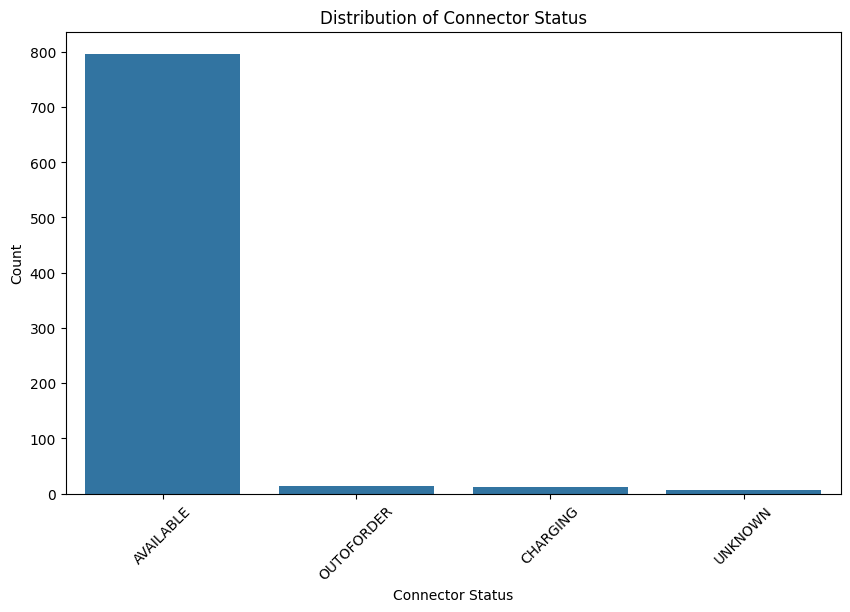

In [52]:
# plot the distribution of connector status
plt.figure(figsize=(10, 6))
sns.countplot(x='connector_status', data=pdr_locations_cleaned)
plt.title('Distribution of Connector Status')
plt.xlabel('Connector Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

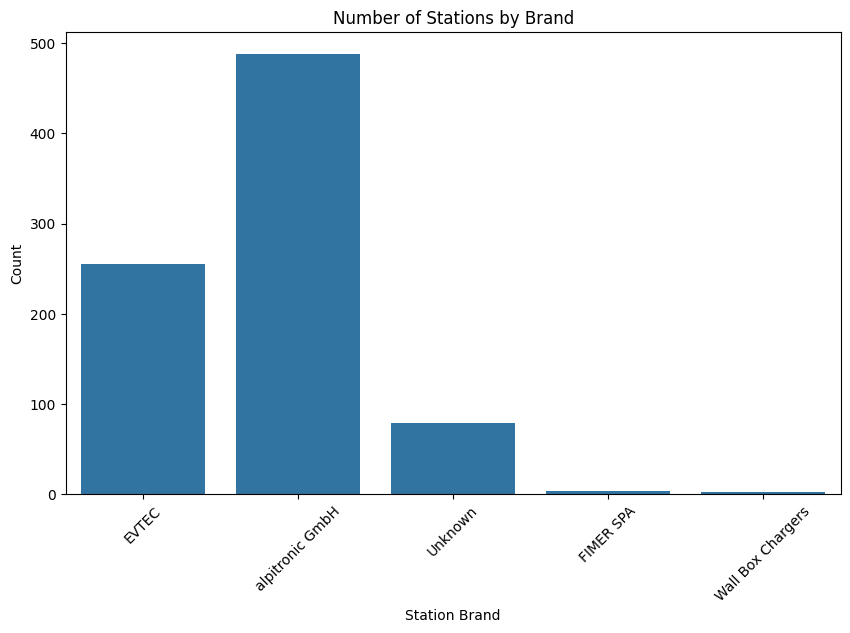

In [53]:
# bar plot of the number of stations by brand
plt.figure(figsize=(10, 6))
sns.countplot(x='station_brand', data=pdr_locations_cleaned)
plt.title('Number of Stations by Brand')
plt.xlabel('Station Brand')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

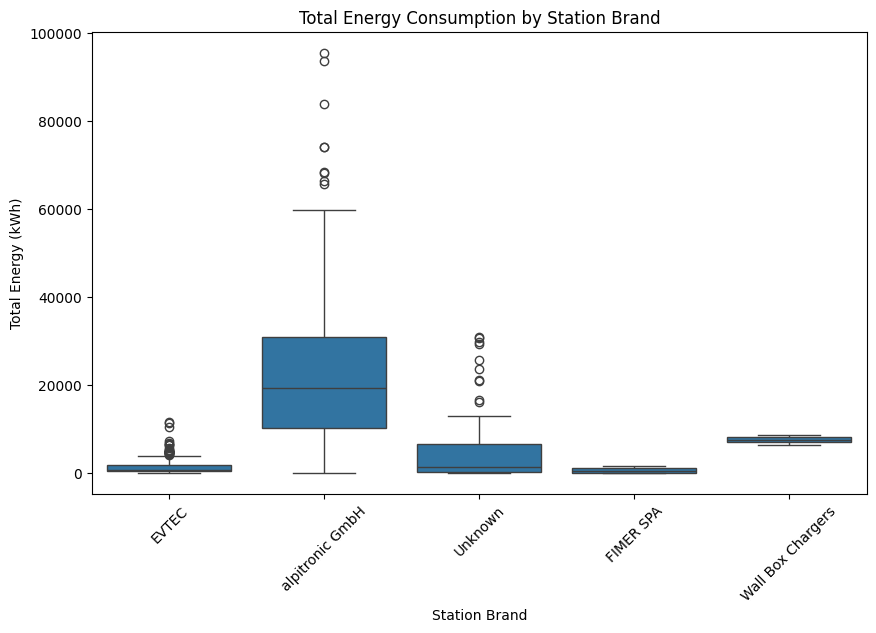

In [54]:
# Box plot of total energy consumption by station brand
plt.figure(figsize=(10, 6))
sns.boxplot(x='station_brand', y='totEnergy', data=pdr_locations_cleaned)
plt.title('Total Energy Consumption by Station Brand')
plt.xlabel('Station Brand')
plt.ylabel('Total Energy (kWh)')
plt.xticks(rotation=45)
plt.show()

### Expanding Dictionaries 

before I thought we need it, now I got we don't need it, so I will comment it.

In [343]:
# Check the type of the first entry in the 'sessions' column
# type(pdr_locations_cleaned['sessions'].iloc[0])

expanding everything but also filling other empty rows according their values.

In [344]:
# import ast

# Convert the 'sessions' column into actual lists of dictionaries
#pdr_locations_cleaned['sessions'] = pdr_locations_cleaned['sessions'].apply(ast.literal_eval)

# Explode the list of dictionaries into separate rows while keeping other columns intact
#sessions_exploded = pdr_locations_cleaned.explode('sessions').reset_index(drop=True)

# Flatten the dictionaries in the 'sessions' column into separate columns
#sessions_expanded = pd.json_normalize(sessions_exploded['sessions'])

# Drop the original 'sessions' column and concatenate the flattened session data
#pdr_locations_cleaned = pd.concat([sessions_exploded.drop(columns=['sessions']), sessions_expanded], axis=1)

# Display the first few rows to verify the result
#pdr_locations_cleaned.head() */"""

In [345]:
#pdr_locations_cleaned.shape

In [55]:
# Checking for missing values in the new expanded DataFrame
missing_values = pdr_locations_cleaned.isnull().sum()

# Filtering to only show columns that have missing values
missing_columns = missing_values[missing_values > 0]

# Display columns with missing values
print(missing_columns)

station_serial_number         79
station_installation_date    120
dtype: int64


In [347]:
"""# Filter rows where all the specified session-related columns are completely NaN
#all_nan_rows = pdr_locations_cleaned[
    pdr_locations_cleaned[['count', 'energy', 'date', 'cost', 'countInHouse', 'countInPublic', 
                                    'energyInHouse', 'energyInPublic', 'costInHouse', 'costInPublic']].isnull().all(axis=1)
]

# Display all rows where all specified columns are NaN
##all_nan_rows

# Check the number of such rows
number_of_all_nan_rows = len(all_nan_rows)
print(f"Number of rows where all specified session-related columns are NaN: {number_of_all_nan_rows}")"""

'# Filter rows where all the specified session-related columns are completely NaN\n#all_nan_rows = pdr_locations_cleaned[\n    pdr_locations_cleaned[[\'count\', \'energy\', \'date\', \'cost\', \'countInHouse\', \'countInPublic\', \n                                    \'energyInHouse\', \'energyInPublic\', \'costInHouse\', \'costInPublic\']].isnull().all(axis=1)\n]\n\n# Display all rows where all specified columns are NaN\n##all_nan_rows\n\n# Check the number of such rows\nnumber_of_all_nan_rows = len(all_nan_rows)\nprint(f"Number of rows where all specified session-related columns are NaN: {number_of_all_nan_rows}")'

as we can see there are 7 rows that have missing values for these 10 columns, so we will drop these rows.

In [348]:
"""# Drop rows where all the specified session-related columns are completely NaN
pdr_locations_cleaned = pdr_locations_cleaned.drop(index=all_nan_rows.index)

# Verify the updated DataFrame
pdr_locations_cleaned.shape[0]  # This will show the number of rows left in the DataFrame"""

'# Drop rows where all the specified session-related columns are completely NaN\npdr_locations_cleaned = pdr_locations_cleaned.drop(index=all_nan_rows.index)\n\n# Verify the updated DataFrame\npdr_locations_cleaned.shape[0]  # This will show the number of rows left in the DataFrame'

In [56]:
pdr_locations_cleaned.shape

(828, 19)

In [57]:
# Checking for missing values in the new expanded DataFrame
missing_values = pdr_locations_cleaned.isnull().sum()

# Filtering to only show columns that have missing values
missing_columns = missing_values[missing_values > 0]

# Display columns with missing values
print(missing_columns)

station_serial_number         79
station_installation_date    120
dtype: int64


we see 79 raws are missing for serial number, so I need to handle them because they will be merged soon with other datasets, so for now, i will just replace with 'unknown' value

In [63]:
pdr_locations_cleaned['station_serial_number'].fillna("Unknown", inplace=True)

In [64]:
# Renaming the column
pdr_locations_cleaned.rename(columns={'station_serial_number': 'serialNumber'}, inplace=True)

if the cost is NaN, i will fill these values with 0:

In [351]:
# Fill NaN values in the 'cost' column with 0
#pdr_locations_cleaned['cost'].fillna(0, inplace=True)

In [65]:
# Checking for missing values in the new expanded DataFrame
missing_values = pdr_locations_cleaned.isnull().sum()

# Filtering to only show columns that have missing values
missing_columns = missing_values[missing_values > 0]

# Display columns with missing values
print(missing_columns)

station_installation_date    120
dtype: int64


now i saw a lot of '0' values in these 10 columns, so let's check if these columns consist of only zero values:

In [353]:
# List of columns to check if they consist only of 0 values
#columns_to_check = ['count', 'energy', 'date', 'cost', 'countInHouse', 'countInPublic', 'energyInHouse', 'energyInPublic', 'costInHouse', 'costInPublic']

# Check if each column consists entirely of 0 values
#zero_columns = (pdr_locations_cleaned[columns_to_check] == 0).all()

# Display which columns are entirely 0
#zero_columns

so i will delete these last 6 columns:)

In [354]:
# Drop the last 6 columns
#pdr_locations_cleaned = pdr_locations_cleaned.iloc[:, :-6]

# Display the updated DataFrame
#pdr_locations_cleaned.head()

In [66]:
pdr_locations_cleaned.shape

(828, 19)

now it looks better, and then, I need to think about plugs column, doing the same?)

In [356]:
# Check the type of the first entry in the 'plugs' column
#type(pdr_locations_cleaned['plugs'].iloc[0])

In [357]:
#import ast

# Convert the 'plugs' column into actual lists of dictionaries
#pdr_locations_cleaned['plugs'] = pdr_locations_cleaned['plugs'].apply(ast.literal_eval)

# Explode the list of dictionaries into separate rows while keeping other columns intact
#plugs_exploded = pdr_locations_cleaned.explode('plugs').reset_index(drop=True)

# Flatten the dictionaries in the 'plugs' column into separate columns
#plugs_expanded = pd.json_normalize(plugs_exploded['plugs'])

# Drop the original 'plugs' column and concatenate the flattened plugs data
#pdr_locations_cleaned = pd.concat([plugs_exploded.drop(columns=['plugs']), plugs_expanded], axis=1)

# Display the first few rows to verify the result
#pdr_locations_cleaned.head()

In [67]:
pdr_locations_cleaned.shape

(828, 19)

In [69]:
# Checking for missing values in the new expanded DataFrame
missing_values = pdr_locations_cleaned.isnull().sum()

# Filtering to only show columns that have missing values
missing_columns = missing_values[missing_values > 0]

# Display columns with missing values
print(missing_columns)

station_installation_date    120
dtype: int64


In [70]:
pdr_locations_cleaned['station_installation_date'].fillna('0000-00-00T00:00:00.000000Z', inplace=True)

# Verify the result
print(pdr_locations_cleaned['station_installation_date'].isnull().sum())

0


In [71]:
# Checking for missing values in the new expanded DataFrame
missing_values = pdr_locations_cleaned.isnull().sum()

# Filtering to only show columns that have missing values
missing_columns = missing_values[missing_values > 0]

# Display columns with missing values
print(missing_columns)

Series([], dtype: int64)


In [72]:
pd.set_option('display.max_columns', None)  # None means no limit

print(pdr_locations_cleaned.head())

   connector_id  connector_station_id     connector_evse_id connector_status  \
0        462849                385079  IT*F2X*EF2XITA2151*1        AVAILABLE   
1        462850                385079  IT*F2X*EF2XITA2151*2        AVAILABLE   
2        462851                385079  IT*F2X*EF2XITA2151*3        AVAILABLE   
3        966351                578546  IT*F2X*EF2XITN3001*1        AVAILABLE   
4        966352                578546  IT*F2X*EF2XITN3001*2        AVAILABLE   

                      station_name             station_address  \
0    Area di Servizio - Arda Ovest    A1 - Autostrada del Sole   
1    Area di Servizio - Arda Ovest    A1 - Autostrada del Sole   
2    Area di Servizio - Arda Ovest    A1 - Autostrada del Sole   
3  Area di Servizio - Rubicone Est  A14 - Autostrada Adriatica   
4  Area di Servizio - Rubicone Est  A14 - Autostrada Adriatica   

   station_postal_code            station_city  station_coordinates_lat  \
0                29017      Fiorenzuola d'Arda 

### Feature creation

creating new features : year, month, week:

In [73]:
# convert the 'station_installation_date' column to datetime format
pdr_locations_cleaned['station_installation_date'] = pd.to_datetime(pdr_locations_cleaned['station_installation_date'], errors='coerce')

# create new columns for year, month, and week
pdr_locations_cleaned['station_installation_year'] = pdr_locations_cleaned['station_installation_date'].dt.year
pdr_locations_cleaned['station_installation_month'] = pdr_locations_cleaned['station_installation_date'].dt.month
pdr_locations_cleaned['station_installation_week'] = pdr_locations_cleaned['station_installation_date'].dt.isocalendar().week

In [74]:
# convert year, month, and week columns to integer, filling NaN values with 0 (or another appropriate value)
pdr_locations_cleaned['station_installation_year'] = pdr_locations_cleaned['station_installation_year'].fillna(0).astype(int)
pdr_locations_cleaned['station_installation_month'] = pdr_locations_cleaned['station_installation_month'].fillna(0).astype(int)
pdr_locations_cleaned['station_installation_week'] = pdr_locations_cleaned['station_installation_week'].fillna(0).astype(int)

# display the first few rows to verify the changes
pdr_locations_cleaned[['station_installation_date', 'station_installation_year', 'station_installation_month', 'station_installation_week']].head()

,station_installation_date,station_installation_year,station_installation_month,station_installation_week
0,2022-04-22 00:00:00+00:00,2022,4,16
1,2022-04-22 00:00:00+00:00,2022,4,16
2,2022-04-22 00:00:00+00:00,2022,4,16
3,2023-03-30 00:00:00+00:00,2023,3,13
4,2023-03-30 00:00:00+00:00,2023,3,13


In [75]:
# Drop the 'station_installation_date' column
pdr_locations_cleaned.drop(columns=['station_installation_date'], inplace=True)

In [76]:
pdr_locations_cleaned.head()

,connector_id,connector_station_id,connector_evse_id,connector_status,station_name,station_address,station_postal_code,station_city,station_coordinates_lat,station_coordinates_lon,station_brand,serialNumber,station_type_status,plugs,sessions,totEnergy,totSessions,totCost,station_installation_year,station_installation_month,station_installation_week
0,462849,385079,IT*F2X*EF2XITA2151*1,AVAILABLE,Area di Servizio - Arda Ovest,A1 - Autostrada del Sole,29017,Fiorenzuola d'Arda,44.962660,9.904260,EVTEC,22111384 10941.0B - 22111384 10941.0B,public,"[{'max_electric_power': 62500, 'max_voltage': 500, 'power_type_id': 3, 'plug_type_id': 21, 'plug_format_id': 2, 'type': 'COMBO', 'format': 'CABLE'}]","[{'count': 19, 'energy': 323.54699999999997, 'date': '2024-01', 'cost': '177.93', 'countInHouse': 0, 'countInPublic': 0, 'energyInHouse': 0, 'energyInPublic': 0, 'costInHouse': 0, 'costInPublic': 0}, {'count': 14, 'energy': 325.219, 'date': '2024-02', 'cost': '178.87', 'countInHouse': 0, 'countInPublic': 0, 'energyInHouse': 0, 'energyInPublic': 0, 'costInHouse': 0, 'costInPublic': 0}, {'count': 14, 'energy': 287.817, 'date': '2024-03', 'cost': '158.31', 'countInHouse': 0, 'countInPublic': 0, 'energyInHouse': 0, 'energyInPublic': 0, 'costInHouse': 0, 'costInPublic': 0}, {'count': 25, 'energy': 543.858, 'date': '2024-04', 'cost': '299.07', 'countInHouse': 0, 'countInPublic': 0, 'energyInHouse': 0, 'energyInPublic': 0, 'costInHouse': 0, 'costInPublic': 0}, {'count': 27, 'energy': 497.32099999999997, 'date': '2024-05', 'cost': '273.53', 'countInHouse': 0, 'countInPublic': 0, 'energyInHouse': 0, 'energyInPublic': 0, 'costInHouse': 0, 'costInPublic': 0}, {'count': 32, 'energy': 593.2139999999999, 'date': '2024-06', 'cost': '327.29', 'countInHouse': 0, 'countInPublic': 0, 'energyInHouse': 0, 'energyInPublic': 0, 'costInHouse': 0, 'costInPublic': 0}, {'count': 36, 'energy': 854.2650000000002, 'date': '2024-07', 'cost': '474.35', 'countInHouse': 0, 'countInPublic': 0, 'energyInHouse': 0, 'energyInPublic': 0, 'costInHouse': 0, 'costInPublic': 0}, {'count': 32, 'energy': 710.9700000000001, 'date': '2024-08', 'cost': '391.04', 'countInHouse': 0, 'countInPublic': 0, 'energyInHouse': 0, 'energyInPublic': 0, 'costInHouse': 0, 'costInPublic': 0}, {'count': 2, 'energy': 58.870000000000005, 'date': '2024-09', 'cost': '32.38', 'countInHouse': 0, 'countInPublic': 0, 'energyInHouse': 0, 'energyInPublic': 0, 'costInHouse': 0, 'costInPublic': 0}]",4195.081,201,2312.77,2022,4,16
1,462850,385079,IT*F2X*EF2XITA2151*2,AVAILABLE,Area di Servizio - Arda Ovest,A1 - Autostrada del Sole,29017,Fiorenzuola d'Arda,44.962660,9.904260,EVTEC,22111384 10941.0B - 22111384 10941.0B,public,"[{'max_electric_power': 62500, 'max_voltage': 500, 'power_type_id': 3, 'plug_type_id': 1, 'plug_format_id': 2, 'type': 'CHADEMO', 'format': 'CABLE'}]","[{'count': 14, 'energy': 190.02499999999998, 'date': '2024-01', 'cost': '104.50', 'countInHouse': 0, 'countInPublic': 0, 'energyInHouse': 0, 'energyInPublic': 0, 'costInHouse': 0, 'costInPublic': 0}, {'count': 7, 'energy': 122.517, 'date': '2024-02', 'cost': '67.38', 'countInHouse': 0, 'countInPublic': 0, 'energyInHouse': 0, 'energyInPublic': 0, 'costInHouse': 0, 'costInPublic': 0}, {'count': 10, 'energy': 196.48600000000002, 'date': '2024-03', 'cost': '108.07', 'countInHouse': 0, 'countInPublic': 0, 'energyInHouse': 0, 'energyInPublic': 0, 'costInHouse': 0, 'costInPublic': 0}, {'count': 6, 'energy': 72.606, 'date': '2024-04', 'cost': '39.94', 'countInHouse': 0, 'countInPublic': 0, 'energyInHouse': 0, 'energyInPublic': 0, 'costInHouse': 0, 'costInPublic': 0}, {'count': 13, 'energy': 223.766, 'date': '2024-05', 'cost': '123.08', 'countInHouse': 0, 'countInPublic': 0, 'energyInHouse': 0, 'energyInPublic': 0, 'costInHouse': 0, 'costInPublic': 0}, {'count': 5, 'energy': 76.929, 'date': '2024-06', 'cost': '42.31', 'countInHouse': 0, 'countInPublic': 0, 'energyInHouse': 0, 'energyInPublic': 0, 'costInHouse': 0, 'costInPublic': 0}, {'count': 12, 'energy

After analyzing the dataset, I found that it would be better to delete some columns like **totEnergy**, **totSessions**, **totCost** because:

1) the column **energy** has the same information, but for each session of each connector in charging point, otherwise we have the same total values in each row, which can be confusing.
2) the column **count** has the same info as **totSessions**
3) **cost** = **totCost**

so that later in EDA I can use the column just grouping by connector_id.

In [77]:
pdr_locations_cleaned.head(1)

,connector_id,connector_station_id,connector_evse_id,connector_status,station_name,station_address,station_postal_code,station_city,station_coordinates_lat,station_coordinates_lon,station_brand,serialNumber,station_type_status,plugs,sessions,totEnergy,totSessions,totCost,station_installation_year,station_installation_month,station_installation_week
0,462849,385079,IT*F2X*EF2XITA2151*1,AVAILABLE,Area di Servizio - Arda Ovest,A1 - Autostrada del Sole,29017,Fiorenzuola d'Arda,44.96266,9.90426,EVTEC,22111384 10941.0B - 22111384 10941.0B,public,"[{'max_electric_power': 62500, 'max_voltage': 500, 'power_type_id': 3, 'plug_type_id': 21, 'plug_format_id': 2, 'type': 'COMBO', 'format': 'CABLE'}]","[{'count': 19, 'energy': 323.54699999999997, 'date': '2024-01', 'cost': '177.93', 'countInHouse': 0, 'countInPublic': 0, 'energyInHouse': 0, 'energyInPublic': 0, 'costInHouse': 0, 'costInPublic': 0}, {'count': 14, 'energy': 325.219, 'date': '2024-02', 'cost': '178.87', 'countInHouse': 0, 'countInPublic': 0, 'energyInHouse': 0, 'energyInPublic': 0, 'costInHouse': 0, 'costInPublic': 0}, {'count': 14, 'energy': 287.817, 'date': '2024-03', 'cost': '158.31', 'countInHouse': 0, 'countInPublic': 0, 'energyInHouse': 0, 'energyInPublic': 0, 'costInHouse': 0, 'costInPublic': 0}, {'count': 25, 'energy': 543.858, 'date': '2024-04', 'cost': '299.07', 'countInHouse': 0, 'countInPublic': 0, 'energyInHouse': 0, 'energyInPublic': 0, 'costInHouse': 0, 'costInPublic': 0}, {'count': 27, 'energy': 497.32099999999997, 'date': '2024-05', 'cost': '273.53', 'countInHouse': 0, 'countInPublic': 0, 'energyInHouse': 0, 'energyInPublic': 0, 'costInHouse': 0, 'costInPublic': 0}, {'count': 32, 'energy': 593.2139999999999, 'date': '2024-06', 'cost': '327.29', 'countInHouse': 0, 'countInPublic': 0, 'energyInHouse': 0, 'energyInPublic': 0, 'costInHouse': 0, 'costInPublic': 0}, {'count': 36, 'energy': 854.2650000000002, 'date': '2024-07', 'cost': '474.35', 'countInHouse': 0, 'countInPublic': 0, 'energyInHouse': 0, 'energyInPublic': 0, 'costInHouse': 0, 'costInPublic': 0}, {'count': 32, 'energy': 710.9700000000001, 'date': '2024-08', 'cost': '391.04', 'countInHouse': 0, 'countInPublic': 0, 'energyInHouse': 0, 'energyInPublic': 0, 'costInHouse': 0, 'costInPublic': 0}, {'count': 2, 'energy': 58.870000000000005, 'date': '2024-09', 'cost': '32.38', 'countInHouse': 0, 'countInPublic': 0, 'energyInHouse': 0, 'energyInPublic': 0, 'costInHouse': 0, 'costInPublic': 0}]",4195.081,201,2312.77,2022,4,16


In [78]:
columns_to_delete = ['totCost', 'totSessions', 'totEnergy', 'plugs', 'sessions']

# Delete the specified columns from the dataset
pdr_locations_cleaned = pdr_locations_cleaned.drop(columns=columns_to_delete)

now i will rename some columns so that you can understand it better:

In [369]:
#pdr_locations_cleaned = pdr_locations_cleaned.rename(columns={'count': 'number_of_sessions'})

It would also be better if i drop these columns: **format**, **type**, as i already have their id in the dataset.

1) format = plug_format_id
2) plug_type_id = type

I will leave 'type', and delete plug_type_id as in CDR we have this column.

In [370]:
#columns_to_delete = ['format', 'plug_type_id']

# Delete the specified columns from the dataset
#pdr_locations_cleaned = pdr_locations_cleaned.drop(columns=columns_to_delete)

i want the column number_of_sessions to be integer:

In [371]:
# Convert 'number_of_sessions' column to integer
#pdr_locations_cleaned['number_of_sessions'] = pd.to_numeric(pdr_locations_cleaned['number_of_sessions'], errors='coerce').astype('Int64')

In [79]:
print(pdr_locations_cleaned.dtypes)

connector_id                    int64
connector_station_id            int64
connector_evse_id              object
connector_status               object
station_name                   object
station_address                object
station_postal_code             int64
station_city                   object
station_coordinates_lat       float64
station_coordinates_lon       float64
station_brand                  object
serialNumber                   object
station_type_status            object
station_installation_year       int32
station_installation_month      int32
station_installation_week       int32
dtype: object


i want to change type of date, cost:

1) date: object to date
2) cost: object to float

In [373]:
#pdr_locations_cleaned['date'] = pd.to_datetime(pdr_locations_cleaned['date'], errors='coerce')
#pdr_locations_cleaned['cost'] = pd.to_numeric(pdr_locations_cleaned['cost'], errors='coerce')

In [80]:
print(pdr_locations_cleaned.dtypes)

connector_id                    int64
connector_station_id            int64
connector_evse_id              object
connector_status               object
station_name                   object
station_address                object
station_postal_code             int64
station_city                   object
station_coordinates_lat       float64
station_coordinates_lon       float64
station_brand                  object
serialNumber                   object
station_type_status            object
station_installation_year       int32
station_installation_month      int32
station_installation_week       int32
dtype: object


now, i will create new columns from date and delete date:

In [375]:
# Ensure 'date' column is properly converted to datetime
#pdr_locations_cleaned['date'] = pd.to_datetime(pdr_locations_cleaned['date'], errors='coerce')

# Extract month and year from the 'date' column
#dr_locations_cleaned['month_of_session'] = pdr_locations_cleaned['date'].dt.month
#pdr_locations_cleaned['year_of_session'] = pdr_locations_cleaned['date'].dt.year

In [376]:
#pdr_locations_cleaned = pdr_locations_cleaned.drop(columns=['date'])

In [81]:
pdr_locations_cleaned.head()

,connector_id,connector_station_id,connector_evse_id,connector_status,station_name,station_address,station_postal_code,station_city,station_coordinates_lat,station_coordinates_lon,station_brand,serialNumber,station_type_status,station_installation_year,station_installation_month,station_installation_week
0,462849,385079,IT*F2X*EF2XITA2151*1,AVAILABLE,Area di Servizio - Arda Ovest,A1 - Autostrada del Sole,29017,Fiorenzuola d'Arda,44.962660,9.904260,EVTEC,22111384 10941.0B - 22111384 10941.0B,public,2022,4,16
1,462850,385079,IT*F2X*EF2XITA2151*2,AVAILABLE,Area di Servizio - Arda Ovest,A1 - Autostrada del Sole,29017,Fiorenzuola d'Arda,44.962660,9.904260,EVTEC,22111384 10941.0B - 22111384 10941.0B,public,2022,4,16
2,462851,385079,IT*F2X*EF2XITA2151*3,AVAILABLE,Area di Servizio - Arda Ovest,A1 - Autostrada del Sole,29017,Fiorenzuola d'Arda,44.962660,9.904260,EVTEC,22111384 10941.0B - 22111384 10941.0B,public,2022,4,16
3,966351,578546,IT*F2X*EF2XITN3001*1,AVAILABLE,Area di Servizio - Rubicone Est,A14 - Autostrada Adriatica,47039,Savignano sul Rubicone,44.116922,12.409015,alpitronic GmbH,HYC_300_22BZ6977B - HYC_300_22BZ6977B,public,2023,3,13
4,966352,578546,IT*F2X*EF2XITN3001*2,AVAILABLE,Area di Servizio - Rubicone Est,A14 - Autostrada Adriatica,47039,Savignano sul Rubicone,44.116922,12.409015,alpitronic GmbH,HYC_300_22BZ6977B - HYC_300_22BZ6977B,public,2023,3,13


In [82]:
# Check if columns in 'pdr_locations_cleaned' have more than one unique value
columns_with_multiple_values = pdr_locations_cleaned.nunique() > 1

# Display columns that have more than one unique value
columns_with_multiple_values[columns_with_multiple_values]

connector_id                  True
connector_station_id          True
connector_evse_id             True
connector_status              True
station_name                  True
station_address               True
station_postal_code           True
station_city                  True
station_coordinates_lat       True
station_coordinates_lon       True
station_brand                 True
serialNumber                  True
station_type_status           True
station_installation_year     True
station_installation_month    True
station_installation_week     True
dtype: bool

In [83]:
pdr_locations_cleaned.shape

(828, 16)

We want to make sure that our datasets have the same keys to be merged, so I will rename some columns:
+ connector_evse_id => chargePointIdentity
+ station_coordinates_lat => gpsLat
+ station_coordinates_lon => gpsLong
+ max_electric_power => charging_power and also I need to divide this column by 1000, to be the same as in CDR as kiloWatts.
+ type => plug_type

In [84]:
# Renaming columns
pdr_locations_cleaned.rename(columns={
    'connector_evse_id': 'chargePointIdentity',
    'station_coordinates_lat': 'gpsLat',
    'station_coordinates_lon': 'gpsLong',
    #'max_electric_power': 'charging_power',
    #'type': 'plug_type'
}, inplace=True)

# Dividing charging_power by 1000 to convert it to kiloWatts
#pdr_locations_cleaned['charging_power'] = pdr_locations_cleaned['charging_power'] / 1000

In [85]:
cdr = pd.read_csv('C:\\Users\\Камила\\Downloads\\cdr_cleaned_task1.csv')
cdr.dtypes

chargePointIdentity     object
operator                object
charging_power         float64
station_name            object
station_city            object
station_address         object
date                    object
start_time              object
end_time                object
revenues               float64
energy                 float64
total_time               int64
plug_type               object
dtype: object

In [86]:
cdr.shape

(300000, 13)

In [383]:
#cdr.to_csv('C:\\Users\\Камила\\Big_data\\charging_stations\\dataset\\task_1\\cdr_cleaned_task1.csv', index=False)

In [384]:
# Convert the 'charging_power' column from float to integer
#pdr_locations_cleaned['charging_power'] = pdr_locations_cleaned['charging_power'].astype(int)

In [87]:
pdr_locations_cleaned.head()

,connector_id,connector_station_id,chargePointIdentity,connector_status,station_name,station_address,station_postal_code,station_city,gpsLat,gpsLong,station_brand,serialNumber,station_type_status,station_installation_year,station_installation_month,station_installation_week
0,462849,385079,IT*F2X*EF2XITA2151*1,AVAILABLE,Area di Servizio - Arda Ovest,A1 - Autostrada del Sole,29017,Fiorenzuola d'Arda,44.962660,9.904260,EVTEC,22111384 10941.0B - 22111384 10941.0B,public,2022,4,16
1,462850,385079,IT*F2X*EF2XITA2151*2,AVAILABLE,Area di Servizio - Arda Ovest,A1 - Autostrada del Sole,29017,Fiorenzuola d'Arda,44.962660,9.904260,EVTEC,22111384 10941.0B - 22111384 10941.0B,public,2022,4,16
2,462851,385079,IT*F2X*EF2XITA2151*3,AVAILABLE,Area di Servizio - Arda Ovest,A1 - Autostrada del Sole,29017,Fiorenzuola d'Arda,44.962660,9.904260,EVTEC,22111384 10941.0B - 22111384 10941.0B,public,2022,4,16
3,966351,578546,IT*F2X*EF2XITN3001*1,AVAILABLE,Area di Servizio - Rubicone Est,A14 - Autostrada Adriatica,47039,Savignano sul Rubicone,44.116922,12.409015,alpitronic GmbH,HYC_300_22BZ6977B - HYC_300_22BZ6977B,public,2023,3,13
4,966352,578546,IT*F2X*EF2XITN3001*2,AVAILABLE,Area di Servizio - Rubicone Est,A14 - Autostrada Adriatica,47039,Savignano sul Rubicone,44.116922,12.409015,alpitronic GmbH,HYC_300_22BZ6977B - HYC_300_22BZ6977B,public,2023,3,13


In [386]:
#pdr_locations_cleaned.charging_power.value_counts()

In [88]:
pdr_locations_cleaned.station_type_status.value_counts()

public             818
to_be_installed     10
Name: station_type_status, dtype: int64

In [89]:
columns_to_delete = ['connector_id', 'connector_status', 'station_postal_code', 'station_name', 'station_address', 'station_type_status']
pdr_locations_cleaned = pdr_locations_cleaned.drop(columns=columns_to_delete)
pdr_locations_cleaned.head()

,connector_station_id,chargePointIdentity,station_city,gpsLat,gpsLong,station_brand,serialNumber,station_installation_year,station_installation_month,station_installation_week
0,385079,IT*F2X*EF2XITA2151*1,Fiorenzuola d'Arda,44.962660,9.904260,EVTEC,22111384 10941.0B - 22111384 10941.0B,2022,4,16
1,385079,IT*F2X*EF2XITA2151*2,Fiorenzuola d'Arda,44.962660,9.904260,EVTEC,22111384 10941.0B - 22111384 10941.0B,2022,4,16
2,385079,IT*F2X*EF2XITA2151*3,Fiorenzuola d'Arda,44.962660,9.904260,EVTEC,22111384 10941.0B - 22111384 10941.0B,2022,4,16
3,578546,IT*F2X*EF2XITN3001*1,Savignano sul Rubicone,44.116922,12.409015,alpitronic GmbH,HYC_300_22BZ6977B - HYC_300_22BZ6977B,2023,3,13
4,578546,IT*F2X*EF2XITN3001*2,Savignano sul Rubicone,44.116922,12.409015,alpitronic GmbH,HYC_300_22BZ6977B - HYC_300_22BZ6977B,2023,3,13


In [90]:
pdr_locations_cleaned.shape

(828, 10)

This is cleaned dataset fro PDR LOCATIONS.

In [ ]:
#pdr_locations_cleaned.to_csv('C:\\Users\\Камила\\Big_data\\charging_stations\\dataset\\task_1\\pdr_locations_cleaned_task1.csv', index=False)

That's what we thought! But then the company told us more details, so now we don't need other columns, so I will simply delete them. because we already have them in CDR dataset.

In [92]:
columns_to_delete = ['station_name', 'station_address', 'operator']
cdr = cdr.drop(columns=columns_to_delete)
cdr.head()

,chargePointIdentity,charging_power,station_city,date,start_time,end_time,revenues,energy,total_time,plug_type
0,IT*F2X*EF2XITA2001*2,300.0,Casa Nuova,2023-10-20,21:05:40,21:22:15,0.00,31.812,16,COMBO
1,IT*F2X*EF2XITMXPC02*2,300.0,Ferno,2024-01-16,08:24:33,08:46:23,1.20,1.772,21,COMBO
2,IT*F2X*EF2XITB5102*1,300.0,Teano,2023-07-01,02:02:27,02:27:36,30.00,44.116,25,COMBO
3,IT*F2X*EF2XITA3001*2,300.0,Modena,2023-07-01,02:04:36,02:11:01,7.93,11.656,6,COMBO
4,IT*F2X*EF2XITLINC02*2,300.0,Milano,2023-07-01,02:08:22,02:34:55,18.98,27.912,26,COMBO


This is cleaned dataset fro CDR LOCATIONS.

In [ ]:
#cdr.to_csv('C:\\Users\\Камила\\Big_data\\charging_stations\\dataset\\task_1\\cdr_cleaned_task1.csv', index=False)

In [94]:
cdr.head(5)

,chargePointIdentity,charging_power,station_city,date,start_time,end_time,revenues,energy,total_time,plug_type
0,IT*F2X*EF2XITA2001*2,300.0,Casa Nuova,2023-10-20,21:05:40,21:22:15,0.00,31.812,16,COMBO
1,IT*F2X*EF2XITMXPC02*2,300.0,Ferno,2024-01-16,08:24:33,08:46:23,1.20,1.772,21,COMBO
2,IT*F2X*EF2XITB5102*1,300.0,Teano,2023-07-01,02:02:27,02:27:36,30.00,44.116,25,COMBO
3,IT*F2X*EF2XITA3001*2,300.0,Modena,2023-07-01,02:04:36,02:11:01,7.93,11.656,6,COMBO
4,IT*F2X*EF2XITLINC02*2,300.0,Milano,2023-07-01,02:08:22,02:34:55,18.98,27.912,26,COMBO


In [97]:
cdr.shape

(300000, 10)

In [98]:
pdr_locations_cleaned.shape

(828, 10)

In [95]:
pdr_locations_cleaned.head()

,connector_station_id,chargePointIdentity,station_city,gpsLat,gpsLong,station_brand,serialNumber,station_installation_year,station_installation_month,station_installation_week
0,385079,IT*F2X*EF2XITA2151*1,Fiorenzuola d'Arda,44.962660,9.904260,EVTEC,22111384 10941.0B - 22111384 10941.0B,2022,4,16
1,385079,IT*F2X*EF2XITA2151*2,Fiorenzuola d'Arda,44.962660,9.904260,EVTEC,22111384 10941.0B - 22111384 10941.0B,2022,4,16
2,385079,IT*F2X*EF2XITA2151*3,Fiorenzuola d'Arda,44.962660,9.904260,EVTEC,22111384 10941.0B - 22111384 10941.0B,2022,4,16
3,578546,IT*F2X*EF2XITN3001*1,Savignano sul Rubicone,44.116922,12.409015,alpitronic GmbH,HYC_300_22BZ6977B - HYC_300_22BZ6977B,2023,3,13
4,578546,IT*F2X*EF2XITN3001*2,Savignano sul Rubicone,44.116922,12.409015,alpitronic GmbH,HYC_300_22BZ6977B - HYC_300_22BZ6977B,2023,3,13


MERGING

let's try to join first by outer join

ok, so I tried it, it seems to me it's better to do inner join, as with outer it has too many nan values, and all the unneccessary info.

In [96]:
# Merge the datasets using an outer join on 'chargePointIdentity'
merged_data = pdr_locations_cleaned.merge(cdr, on='chargePointIdentity', how='inner')

# Display the first few rows of the merged data
merged_data.head()

,connector_station_id,chargePointIdentity,station_city_x,gpsLat,gpsLong,station_brand,serialNumber,station_installation_year,station_installation_month,station_installation_week,charging_power,station_city_y,date,start_time,end_time,revenues,energy,total_time,plug_type
0,385079,IT*F2X*EF2XITA2151*1,Fiorenzuola d'Arda,44.96266,9.90426,EVTEC,22111384 10941.0B - 22111384 10941.0B,2022,4,16,62.5,Fiorenzuola d'Arda,2023-07-05,09:50:00,10:13:43,11.52,20.942,23,COMBO
1,385079,IT*F2X*EF2XITA2151*1,Fiorenzuola d'Arda,44.96266,9.90426,EVTEC,22111384 10941.0B - 22111384 10941.0B,2022,4,16,62.5,Fiorenzuola d'Arda,2023-07-05,16:43:13,17:04:45,7.29,13.246,21,COMBO
2,385079,IT*F2X*EF2XITA2151*1,Fiorenzuola d'Arda,44.96266,9.90426,EVTEC,22111384 10941.0B - 22111384 10941.0B,2022,4,16,62.5,Fiorenzuola d'Arda,2023-07-06,19:54:36,21:07:26,34.06,61.936,72,COMBO
3,385079,IT*F2X*EF2XITA2151*1,Fiorenzuola d'Arda,44.96266,9.90426,EVTEC,22111384 10941.0B - 22111384 10941.0B,2022,4,16,62.5,Fiorenzuola d'Arda,2023-07-07,13:52:00,13:57:33,1.97,3.584,5,COMBO
4,385079,IT*F2X*EF2XITA2151*1,Fiorenzuola d'Arda,44.96266,9.90426,EVTEC,22111384 10941.0B - 22111384 10941.0B,2022,4,16,62.5,Fiorenzuola d'Arda,2023-07-07,15:31:36,16:26:33,25.05,45.543,54,COMBO


PDR.shape - (828,10)

CDR.shape - (300000, 10)

In [99]:
merged_data.shape

(299909, 19)

now, i need to check the consistency and clean data again.

0.9 means even that they have different column names, they will show very similar columns that are 90% the same.

In [396]:
"""def find_similar_columns(dataframe, threshold=0.9):
    similar_columns = {}
    
    for col1 in dataframe.columns:
        for col2 in dataframe.columns:
            if col1 != col2:
                match_percentage = (dataframe[col1] == dataframe[col2]).mean()
                
                if match_percentage >= threshold:
                    if col1 not in similar_columns:
                        similar_columns[col1] = [(col2, match_percentage)]
                    else:
                        similar_columns[col1].append((col2, match_percentage))
    return similar_columns"""

'def find_similar_columns(dataframe, threshold=0.9):\n    similar_columns = {}\n    \n    for col1 in dataframe.columns:\n        for col2 in dataframe.columns:\n            if col1 != col2:\n                match_percentage = (dataframe[col1] == dataframe[col2]).mean()\n                \n                if match_percentage >= threshold:\n                    if col1 not in similar_columns:\n                        similar_columns[col1] = [(col2, match_percentage)]\n                    else:\n                        similar_columns[col1].append((col2, match_percentage))\n    return similar_columns'

In [397]:
"""similar_columns1 = find_similar_columns(merged_data)

# Print duplicate columns
print(similar_columns1)"""

'similar_columns1 = find_similar_columns(merged_data)\n\n# Print duplicate columns\nprint(similar_columns1)'

so as i can see these columns, i will delete them

In [100]:
merged_data.dtypes

connector_station_id            int64
chargePointIdentity            object
station_city_x                 object
gpsLat                        float64
gpsLong                       float64
station_brand                  object
serialNumber                   object
station_installation_year       int32
station_installation_month      int32
station_installation_week       int32
charging_power                float64
station_city_y                 object
date                           object
start_time                     object
end_time                       object
revenues                      float64
energy                        float64
total_time                      int64
plug_type                      object
dtype: object

In [101]:
columns_to_delete = [ 'station_city_y'] 
merged_data = merged_data.drop(columns=columns_to_delete)
merged_data.head()

,connector_station_id,chargePointIdentity,station_city_x,gpsLat,gpsLong,station_brand,serialNumber,station_installation_year,station_installation_month,station_installation_week,charging_power,date,start_time,end_time,revenues,energy,total_time,plug_type
0,385079,IT*F2X*EF2XITA2151*1,Fiorenzuola d'Arda,44.96266,9.90426,EVTEC,22111384 10941.0B - 22111384 10941.0B,2022,4,16,62.5,2023-07-05,09:50:00,10:13:43,11.52,20.942,23,COMBO
1,385079,IT*F2X*EF2XITA2151*1,Fiorenzuola d'Arda,44.96266,9.90426,EVTEC,22111384 10941.0B - 22111384 10941.0B,2022,4,16,62.5,2023-07-05,16:43:13,17:04:45,7.29,13.246,21,COMBO
2,385079,IT*F2X*EF2XITA2151*1,Fiorenzuola d'Arda,44.96266,9.90426,EVTEC,22111384 10941.0B - 22111384 10941.0B,2022,4,16,62.5,2023-07-06,19:54:36,21:07:26,34.06,61.936,72,COMBO
3,385079,IT*F2X*EF2XITA2151*1,Fiorenzuola d'Arda,44.96266,9.90426,EVTEC,22111384 10941.0B - 22111384 10941.0B,2022,4,16,62.5,2023-07-07,13:52:00,13:57:33,1.97,3.584,5,COMBO
4,385079,IT*F2X*EF2XITA2151*1,Fiorenzuola d'Arda,44.96266,9.90426,EVTEC,22111384 10941.0B - 22111384 10941.0B,2022,4,16,62.5,2023-07-07,15:31:36,16:26:33,25.05,45.543,54,COMBO


In [102]:
merged_data.rename(columns={
    'station_city_x': 'station_city'
}, inplace=True)

In [103]:
merged_data.shape

(299909, 18)

In [104]:
# Checking for missing values in the new expanded DataFrame
missing_values = merged_data.isnull().sum()

# Filtering to only show columns that have missing values
missing_columns = missing_values[missing_values > 0]

# Display columns with missing values
print(missing_columns)

Series([], dtype: int64)


In [105]:
for column in merged_data.columns:
    unique_values = merged_data[column].nunique()
    if unique_values > 1:
        print(f"Column '{column}' has more than one unique value ({unique_values} unique values).")
    else:
        print(f"Column '{column}' has only one unique value.")

Column 'connector_station_id' has more than one unique value (296 unique values).
Column 'chargePointIdentity' has more than one unique value (676 unique values).
Column 'station_city' has more than one unique value (64 unique values).
Column 'gpsLat' has more than one unique value (279 unique values).
Column 'gpsLong' has more than one unique value (281 unique values).
Column 'station_brand' has more than one unique value (5 unique values).
Column 'serialNumber' has more than one unique value (281 unique values).
Column 'station_installation_year' has more than one unique value (3 unique values).
Column 'station_installation_month' has more than one unique value (13 unique values).
Column 'station_installation_week' has more than one unique value (45 unique values).
Column 'charging_power' has more than one unique value (6 unique values).
Column 'date' has more than one unique value (244 unique values).
Column 'start_time' has more than one unique value (71000 unique values).
Column '

In [106]:
merged_data.shape

(299909, 18)

In [107]:
merged_data.head()

,connector_station_id,chargePointIdentity,station_city,gpsLat,gpsLong,station_brand,serialNumber,station_installation_year,station_installation_month,station_installation_week,charging_power,date,start_time,end_time,revenues,energy,total_time,plug_type
0,385079,IT*F2X*EF2XITA2151*1,Fiorenzuola d'Arda,44.96266,9.90426,EVTEC,22111384 10941.0B - 22111384 10941.0B,2022,4,16,62.5,2023-07-05,09:50:00,10:13:43,11.52,20.942,23,COMBO
1,385079,IT*F2X*EF2XITA2151*1,Fiorenzuola d'Arda,44.96266,9.90426,EVTEC,22111384 10941.0B - 22111384 10941.0B,2022,4,16,62.5,2023-07-05,16:43:13,17:04:45,7.29,13.246,21,COMBO
2,385079,IT*F2X*EF2XITA2151*1,Fiorenzuola d'Arda,44.96266,9.90426,EVTEC,22111384 10941.0B - 22111384 10941.0B,2022,4,16,62.5,2023-07-06,19:54:36,21:07:26,34.06,61.936,72,COMBO
3,385079,IT*F2X*EF2XITA2151*1,Fiorenzuola d'Arda,44.96266,9.90426,EVTEC,22111384 10941.0B - 22111384 10941.0B,2022,4,16,62.5,2023-07-07,13:52:00,13:57:33,1.97,3.584,5,COMBO
4,385079,IT*F2X*EF2XITA2151*1,Fiorenzuola d'Arda,44.96266,9.90426,EVTEC,22111384 10941.0B - 22111384 10941.0B,2022,4,16,62.5,2023-07-07,15:31:36,16:26:33,25.05,45.543,54,COMBO


In [109]:
merged_data.serialNumber.value_counts()

HYC_300_21BZ2781B - HYC_300_21BZ2781B    4717
HYC_300_22BZ3001B - HYC_300_22BZ3001B    4644
HYC_300_21BZ2727B - HYC_300_21BZ2727B    4349
HYC_300_22BZ0664B - HYC_300_22BZ0664B    4002
HYC_300_22BZ2237B - HYC_300_22BZ2237B    3853
HYC_300_22BZ2232B - HYC_300_22BZ2232B    3750
HYC_300_22BZ0545B - HYC_300_22BZ0545B    3418
HYC_300_22BZ2239B - HYC_300_22BZ2239B    3333
HYC_300_22BZ0556B - HYC_300_22BZ0556B    3327
HYC_300_22BZ0668B - HYC_300_22BZ0668B    3134
HYC_300_22BZ0659B - HYC_300_22BZ0659B    3111
HYC_400_23BZ0435D - HYC_400_23BZ0435D    3099
HYC_300_22BZ2235B - HYC_300_22BZ2235B    3073
HYC_300_22BZ0558B - HYC_300_22BZ0558B    2916
HYC_300_22BZ0667B - HYC_300_22BZ0667B    2907
HYC_300_22BZ5326B - HYC_300_22BZ5326B    2892
HYC_300_22BZ0671B - HYC_300_22BZ0671B    2879
HYC_300_22BZ5328B - HYC_300_22BZ5328B    2789
HYC_300_22BZ2236B - HYC_300_22BZ2236B    2751
HYC_300_21BZ3103B - HYC_300_21BZ3103B    2710
HYC_300_22BZ2234B - HYC_300_22BZ2234B    2699
HYC_300_22BZ0662B - HYC_300_22BZ06

In [ ]:
#merged_data.to_csv('C:\\Users\\Камила\\Big_data\\charging_stations\\dataset\\task_1\\cdr_pdr_merged_task1.csv', index=False)

### Visualization before Label encoding to check Customer behaviour ideas

1. Number of already installed stations by time. 

This can show us the overview and the trend of how the electric vehicle (EV) charging infrastructure has expanded over time. 

By analyzing the number of stations installed each year, we can identify periods of rapid growth, and evaluate how quickly charging stations are being deployed in response to the adoption of electric vehicles. This information is crucial for forecasting future infrastructure needs and planning for continued expansion.

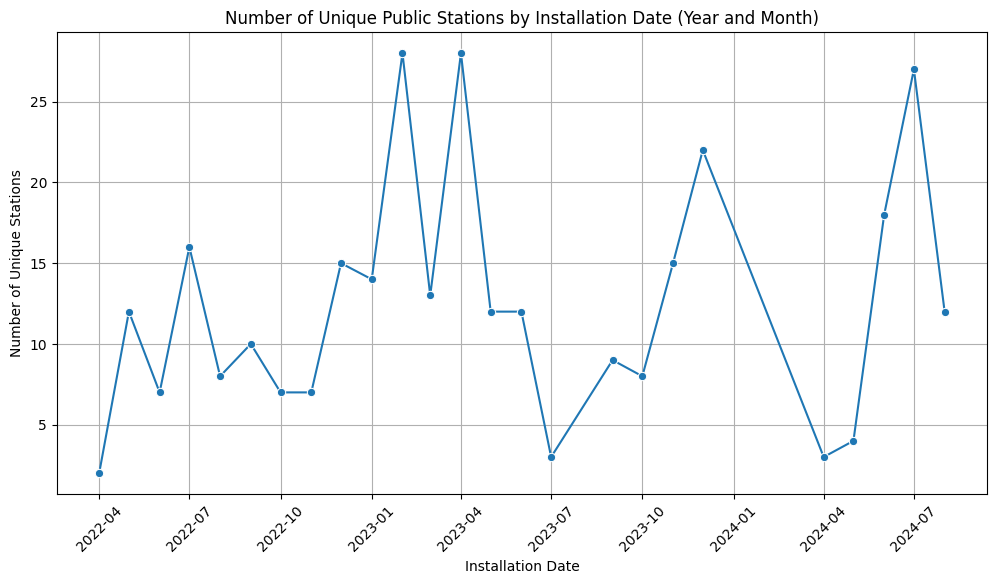

    station_installation_year  station_installation_month  number_of_stations
1                        2022                           4                   2
2                        2022                           5                  12
3                        2022                           6                   7
4                        2022                           7                  16
5                        2022                           8                   8
6                        2022                           9                  10
7                        2022                          10                   7
8                        2022                          11                   7
9                        2022                          12                  15
10                       2023                           1                  14
11                       2023                           2                  28
12                       2023                           3       

In [92]:
#import seaborn as sns

# Filter to include only stations that are already installed and are public
installed_stations = pdr_locations_cleaned[(pdr_locations_cleaned['station_type_status'] == 'public')]

# Grouping by installation year, month, and counting the number of unique stations (using 'connector_station_id')
installation_usage = installed_stations.groupby(['station_installation_year', 'station_installation_month'])['connector_station_id'].nunique().reset_index(name='number_of_stations')

# Remove rows where 'station_installation_month' is 0 or invalid
installation_usage = installation_usage[(installation_usage['station_installation_month'] > 0) & (installation_usage['station_installation_month'] <= 12)]

# Creating a date string from year and month and converting to datetime for proper chronology
installation_usage['installation_date'] = pd.to_datetime(installation_usage['station_installation_year'].astype(str) + '-' + installation_usage['station_installation_month'].astype(str))

# Sorting data by the new 'installation_date'
installation_usage = installation_usage.sort_values(by='installation_date')

# Plotting the relationship between installation date and number of unique stations using a line chart
plt.figure(figsize=(12,6))
sns.lineplot(x='installation_date', y='number_of_stations', data=installation_usage, marker='o')
plt.title('Number of Unique Public Stations by Installation Date (Year and Month)')
plt.xlabel('Installation Date')
plt.ylabel('Number of Unique Stations')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

# Displaying the filtered installation usage data for reference
print(installation_usage[['station_installation_year', 'station_installation_month', 'number_of_stations']])


In [93]:
# Grouping by installation year and counting the number of unique stations (using 'connector_station_id')
stations_by_year = installed_stations.groupby('station_installation_year')['connector_station_id'].nunique().reset_index(name='number_of_stations')

# Displaying the number of stations installed each year
print(stations_by_year.sort_values(by='station_installation_year', ascending=True))


   station_installation_year  number_of_stations
0                          0                  51
1                       2022                  84
2                       2023                 164
3                       2024                  64


In [94]:
#FOR CHECKING 2022
# Filtering the dataset to only include stations installed in 2022
#stations_2022 = installed_stations[installed_stations['station_installation_year'] == 2022]

# Counting the number of unique charging stations installed in 2022
#num_stations_2022 = stations_2022['connector_station_id'].nunique()

# Display the result
#print(num_stations_2022)


In [95]:
# Grouping by installation year and counting both unique stations (connector_station_id) and unique CONNECTORS (connector_id)
stations_and_connectors_by_year = installed_stations.groupby('station_installation_year').agg(
    number_of_stations=('connector_station_id', 'nunique'),
    number_of_connectors=('connector_id', 'nunique')
).reset_index()

# Displaying the number of stations and connectors installed each year
print(stations_and_connectors_by_year.sort_values(by='station_installation_year', ascending=True))


   station_installation_year  number_of_stations  number_of_connectors
0                          0                  51                   114
1                       2022                  84                   187
2                       2023                 164                   385
3                       2024                  64                   130


2. Charging station brands.



Here we can see how many times these brands appear in the dataset.

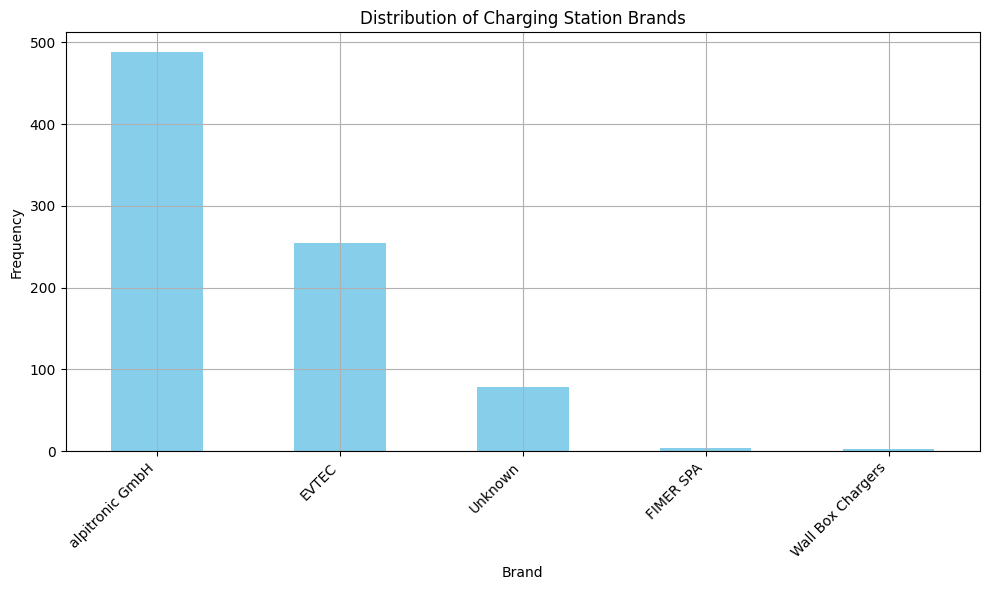

In [96]:
brand_counts = pdr_locations['station_brand'].value_counts()

# Plot the distribution of charging station brands
plt.figure(figsize=(10,6))
brand_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Charging Station Brands')
plt.xlabel('Brand')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()


Below we see the distribution of charging station brands by number of stations.

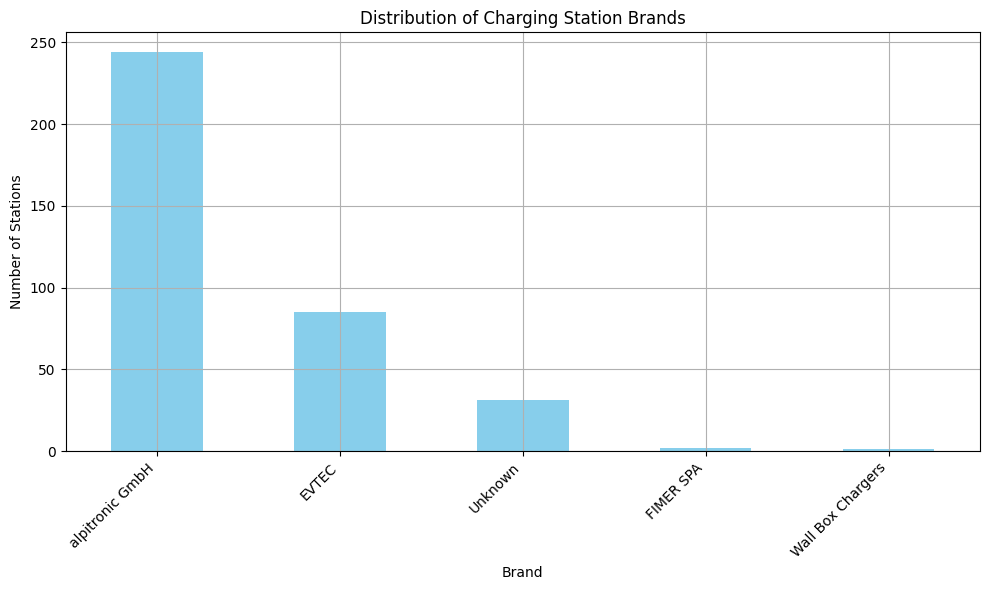

In [100]:
# Filtering the dataset to include only public stations
public_stations = pdr_locations[pdr_locations['station_type_status'] == 'public']

# Grouping by 'connector_station_id' to count unique stations per brand and sorting in descending order
brand_counts = public_stations.groupby('station_brand')['connector_station_id'].nunique().sort_values(ascending=False)

# Plotting the distribution of charging station brands for public stations
plt.figure(figsize=(10,6))
brand_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Charging Station Brands')
plt.xlabel('Brand')
plt.ylabel('Number of Stations')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()

3) Charging Session Trends by Time

Track how customer usage changes over time (based on month_of_session and year_of_session).

Insight: By analyzing session frequency by month and year, we can identify seasonal trends or patterns in charging behavior, helping with capacity planning and identifying high-demand periods.

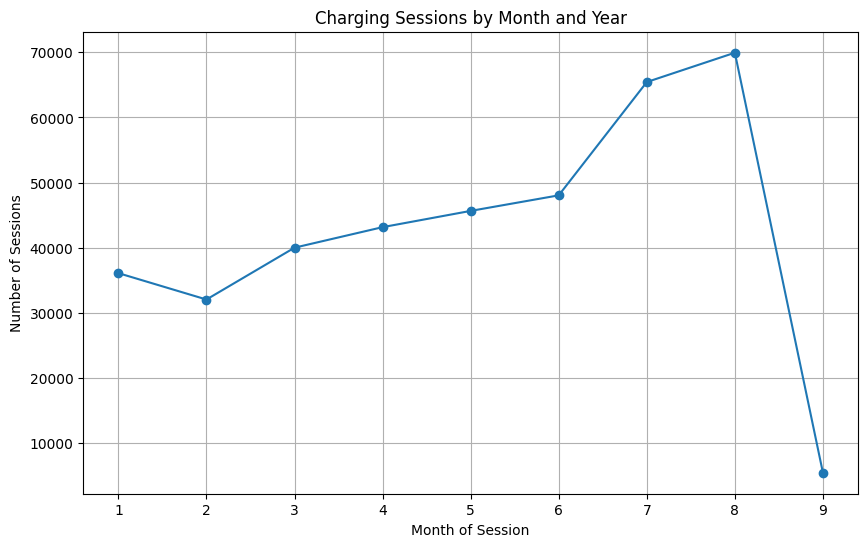

   year_of_session  month_of_session  number_of_sessions
0             2024                 1               36107
1             2024                 2               32059
2             2024                 3               40012
3             2024                 4               43163
4             2024                 5               45657
5             2024                 6               48044
6             2024                 7               65429
7             2024                 8               69927
8             2024                 9                5484


In [118]:
import pandas as pd
import matplotlib.pyplot as plt

# Summing 'number_of_sessions' by 'year_of_session' and 'month_of_session'
session_trends = pdr_locations_cleaned.groupby(['year_of_session', 'month_of_session'])['number_of_sessions'].sum().reset_index()

# Plotting the session trends over time
plt.figure(figsize=(10,6))
plt.plot(session_trends['month_of_session'], session_trends['number_of_sessions'], marker='o')
plt.title('Charging Sessions by Month and Year')
plt.xlabel('Month of Session')
plt.ylabel('Number of Sessions')
plt.grid(True)
plt.show()

# Displaying the trend data
print(session_trends)

However, in my dataset we have data only for 2024 from January till September, which cannot show the whole seasonality, but in general we see that there is an increasing trend: more people are interested in charging vehicles.

+ Here we see that session numbers decrease on September, this happened perhaps we don't have data for whole September.

4. Geographical Analysis of Usage

We use the station_city, and station_coordinates_lat/lon columns to track how location affects customer behavior.

Insight: Understanding how different cities and regions see more or less usage can inform where to expand infrastructure or improve services.


In [120]:
# This just shows which cities more frequently appear in the dataset.
pdr_locations_cleaned.station_city.value_counts().head(10)

Milano                        166
Ferrara                       151
Anagni                        147
Belforte Monferrato           147
Civitella In Val di Chiana    147
Melegnano                     146
Caponago                      145
Bologna                       138
Castrocielo                   137
Cascine Maggio                136
Name: station_city, dtype: int64

Below graph shows the number of session by cities in descending order

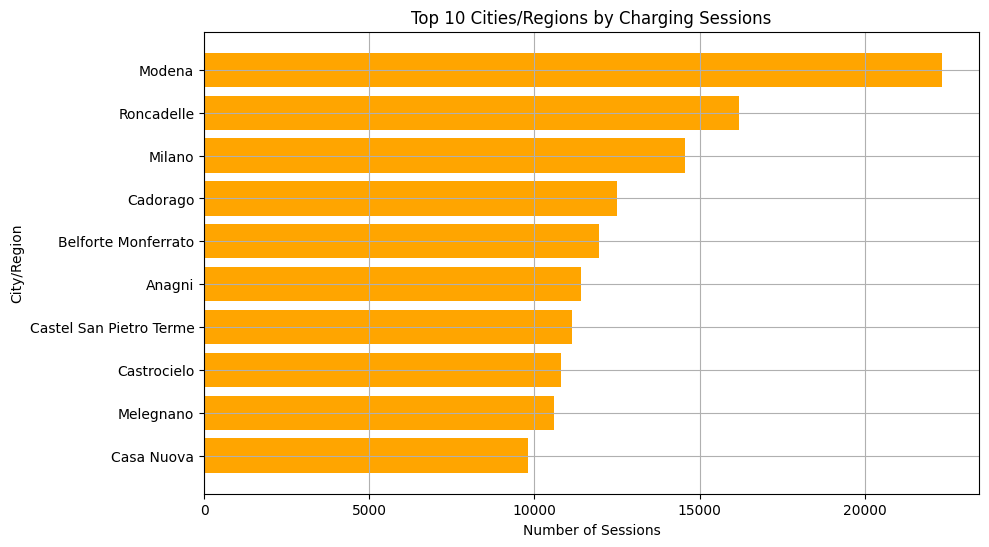

               station_city  number_of_sessions
40                   Modena               22340
51               Roncadelle               16179
38                   Milano               14565
7                  Cadorago               12490
3       Belforte Monferrato               11965
0                    Anagni               11419
16  Castel San Pietro Terme               11145
18              Castrocielo               10799
37                Melegnano               10579
11               Casa Nuova                9806


In [121]:
# Summing the 'number_of_sessions' by 'station_city'
geo_usage = pdr_locations_cleaned.groupby(['station_city'])['number_of_sessions'].sum().reset_index()

# Sorting the data by session count to find the top cities/regions
top_geo_usage = geo_usage.sort_values(by='number_of_sessions', ascending=False).head(10)

# Plotting the top 10 cities/regions with the most sessions
plt.figure(figsize=(10,6))
plt.barh(top_geo_usage['station_city'], top_geo_usage['number_of_sessions'], color='orange')
plt.gca().invert_yaxis()  # Invert the y-axis to start with the top sessions first
plt.title('Top 10 Cities/Regions by Charging Sessions')
plt.xlabel('Number of Sessions')
plt.ylabel('City/Region')
plt.grid(True)
plt.show()

# Display the top cities/regions with most sessions
print(top_geo_usage)

Below map shows the number of sessions based on location

In [122]:
import folium
from folium.plugins import HeatMap

# Create a map centered on Italy
m = folium.Map(location=[41.8719, 12.5674], zoom_start=6)

# Extract coordinates and number of sessions for the heatmap
coordinates = pdr_locations_cleaned[['gpsLat', 'gpsLong', 'number_of_sessions']].dropna()

# Add heatmap to the map, weighting by the number of sessions
HeatMap(data=coordinates[['gpsLat', 'gpsLong', 'number_of_sessions']].values, 
        radius=15).add_to(m)

# Display the map
m

5. Customer Preferences for Station Features

Objective: Analyze customer behavior in relation to the technical features of stations, such as max_electric_power, max_voltage, and plug_type_id.

Insight: High power stations might attract more customers looking for faster charging times. This could inform decisions on which stations should be upgraded or where new high-power stations should be installed.


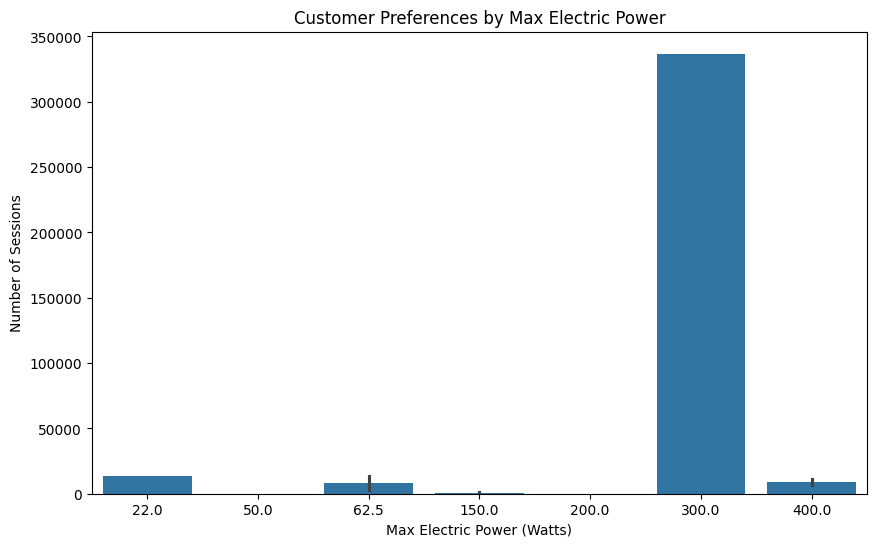

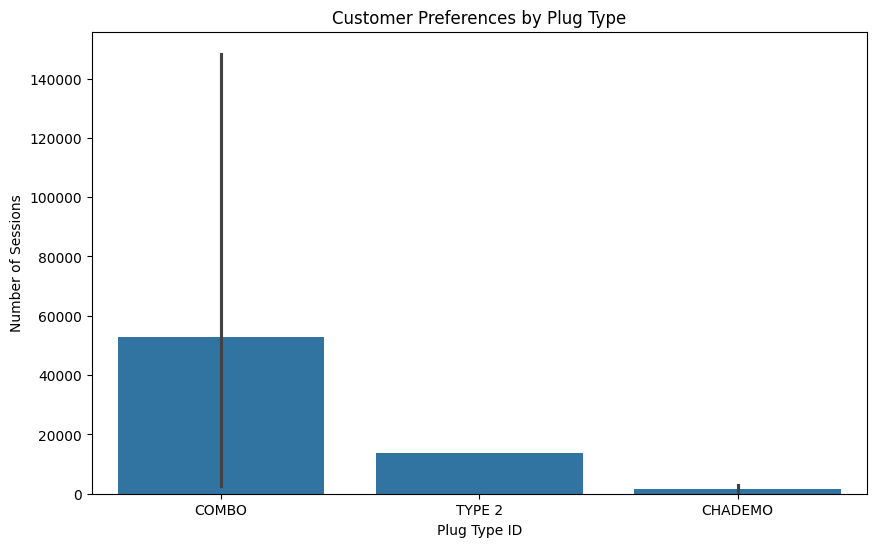

   charging_power  max_voltage plug_type  number_of_sessions
7           300.0          600     COMBO              336757
0            22.0          230    TYPE 2               13689
3            62.5          500     COMBO               13634
9           400.0         1000     COMBO               10985
8           400.0          800     COMBO                6716


In [123]:
# Grouping the data by station features and summing the number of sessions
feature_usage = pdr_locations_cleaned.groupby(['charging_power', 'max_voltage', 'plug_type'])['number_of_sessions'].sum().reset_index()

# Sort the data by session count to identify trends
feature_usage = feature_usage.sort_values(by='number_of_sessions', ascending=False)

# Plotting the relationship between electric power and number of sessions
plt.figure(figsize=(10,6))
sns.barplot(x='charging_power', y='number_of_sessions', data=feature_usage)
plt.title('Customer Preferences by Max Electric Power')
plt.xlabel('Max Electric Power (Watts)')
plt.ylabel('Number of Sessions')
plt.show()

# Plotting the relationship between plug type and session count
plt.figure(figsize=(10,6))
sns.barplot(x='plug_type', y='number_of_sessions', data=feature_usage)
plt.title('Customer Preferences by Plug Type')
plt.xlabel('Plug Type ID')
plt.ylabel('Number of Sessions')
plt.show()

# Displaying the data
print(feature_usage.head())

So, most of session done with COMBO plug type and 300.0 Watts electric power.

Below you can see just by appearance.

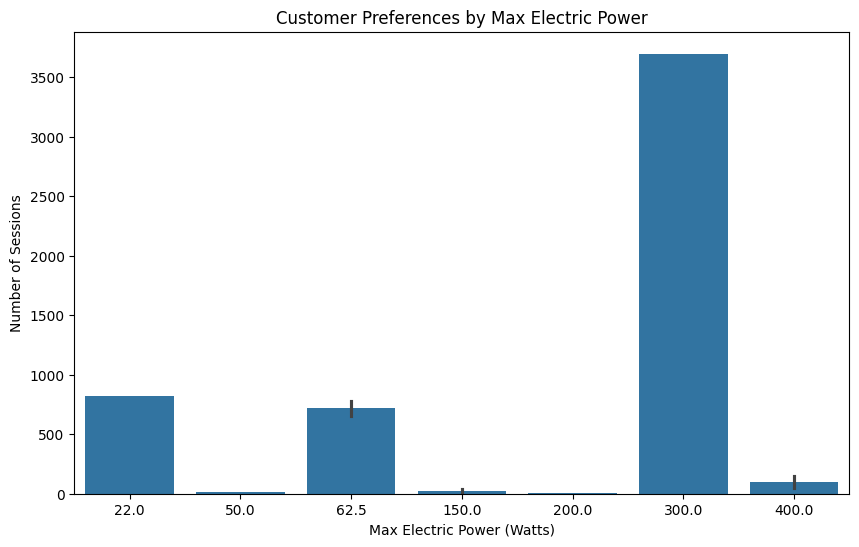

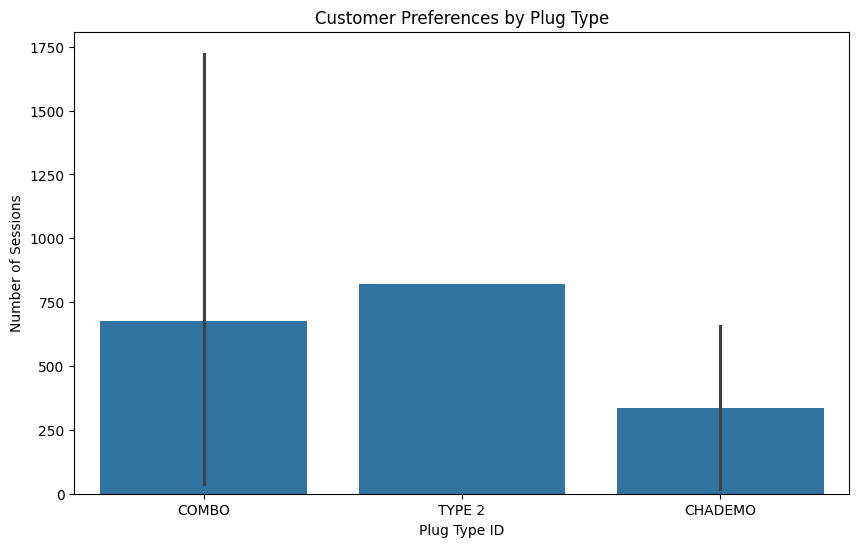

   charging_power  max_voltage plug_type  session_count
7           300.0          600     COMBO           3696
0            22.0          230    TYPE 2            821
3            62.5          500     COMBO            778
2            62.5          500   CHADEMO            656
8           400.0          800     COMBO            151


In [124]:
#import seaborn as sns

# Grouping the data by station features and counting the number of sessions
feature_usage = pdr_locations_cleaned.groupby(['charging_power', 'max_voltage', 'plug_type']).size().reset_index(name='session_count')

# Sort the data by session count to identify trends
feature_usage = feature_usage.sort_values(by='session_count', ascending=False)

# Plotting the relationship between max electric power and number of sessions
plt.figure(figsize=(10,6))
sns.barplot(x='charging_power', y='session_count', data=feature_usage)
plt.title('Customer Preferences by Max Electric Power')
plt.xlabel('Max Electric Power (Watts)')
plt.ylabel('Number of Sessions')
plt.show()

# Plotting the relationship between plug type and session count
plt.figure(figsize=(10,6))
sns.barplot(x='plug_type', y='session_count', data=feature_usage)
plt.title('Customer Preferences by Plug Type')
plt.xlabel('Plug Type ID')
plt.ylabel('Number of Sessions')
plt.show()

# Displaying the data
print(feature_usage.head())


So, we see that even Type 2 is everywhere, people still use COMBO more regarding number of sessions. Of course, there are other factors too that we need to consider before making conclusions.

6. Impact of Station Availability

Objective: Use the connector_status column to track the availability of connectors and how downtime affects customer behavior.

Insight: Analyzing the relationship between connector availability and usage could help optimize maintenance schedules, ensuring stations are operational during peak times.

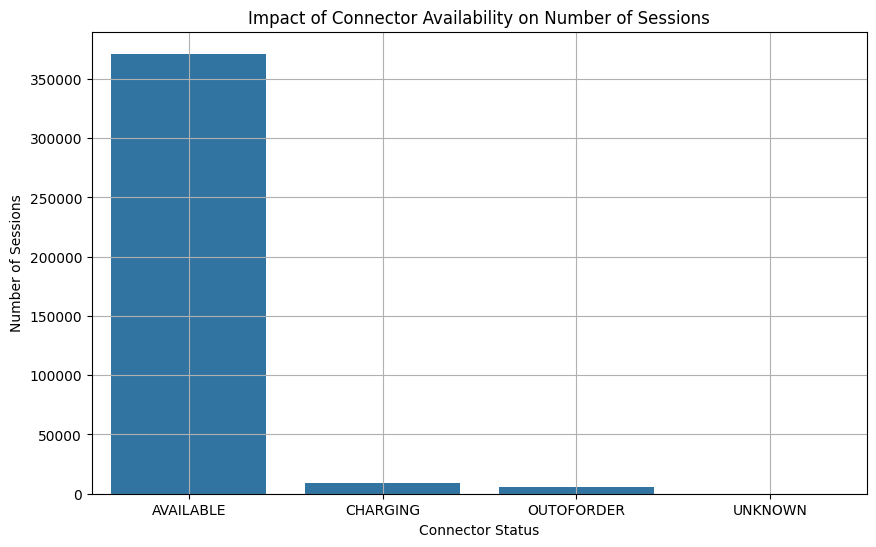

  connector_status  number_of_sessions
0        AVAILABLE              371312
1         CHARGING                9163
2       OUTOFORDER                5406
3          UNKNOWN                   1


In [126]:
# Grouping by 'connector_status' to analyze its impact on usage
availability_usage = pdr_locations_cleaned.groupby('connector_status')['number_of_sessions'].sum().reset_index()

# Sorting the data for better visualization
availability_usage = availability_usage.sort_values(by='number_of_sessions', ascending=False)

# Plotting the relationship between connector availability and number of sessions
plt.figure(figsize=(10,6))
sns.barplot(x='connector_status', y='number_of_sessions', data=availability_usage)
plt.title('Impact of Connector Availability on Number of Sessions')
plt.xlabel('Connector Status')
plt.ylabel('Number of Sessions')
plt.grid(True)
plt.show()

# Displaying the availability data for reference
print(availability_usage)

In [307]:
#pdr_locations_cleaned.to_csv('C:\\Users\\Камила\\Big_data\\charging_stations\\dataset\\task_1\\pdr_locations_cleaned_task1.csv', index=False)

### Label Encoding

This part is actually not that necessary because it's better to do label encoding after merging datasets.

In [132]:
from sklearn.preprocessing import LabelEncoder

# initialize LabelEncoder
le = LabelEncoder()

# list of columns that need label encoding (categorical columns)
columns_to_encode = ['connector_status', 'station_name', 'station_address', 'station_city', 
                     'station_brand', 'station_type_status']

# apply label encoding to the necessary columns
for col in columns_to_encode:
    pdr_locations_cleaned[col] = le.fit_transform(pdr_locations_cleaned[col].astype(str))

# display the first few rows to verify the encoding
print(pdr_locations_cleaned.head())

   connector_id  connector_station_id   chargePointIdentity  connector_status  \
0        462849                385079  IT*F2X*EF2XITA2151*1                 0   
1        462849                385079  IT*F2X*EF2XITA2151*1                 0   
2        462849                385079  IT*F2X*EF2XITA2151*1                 0   
3        462849                385079  IT*F2X*EF2XITA2151*1                 0   
4        462849                385079  IT*F2X*EF2XITA2151*1                 0   

   station_name  station_address  station_postal_code  station_city    gpsLat  \
0             9                2                29017            29  44.96266   
1             9                2                29017            29  44.96266   
2             9                2                29017            29  44.96266   
3             9                2                29017            29  44.96266   
4             9                2                29017            29  44.96266   

   gpsLong  station_brand 

In [133]:
pdr_locations_cleaned.columns

Index(['connector_id', 'connector_station_id', 'chargePointIdentity',
       'connector_status', 'station_name', 'station_address',
       'station_postal_code', 'station_city', 'gpsLat', 'gpsLong',
       'station_brand', 'station_type_status', 'number_of_sessions', 'energy',
       'cost', 'charging_power', 'max_voltage', 'power_type_id',
       'plug_format_id', 'plug_type', 'station_installation_year',
       'station_installation_month', 'station_installation_week',
       'month_of_session', 'year_of_session'],
      dtype='object')

In [134]:
pdr_locations_cleaned.shape

(6228, 25)

In [135]:
pdr_locations_cleaned.head()

,connector_id,connector_station_id,chargePointIdentity,connector_status,station_name,station_address,station_postal_code,station_city,gpsLat,gpsLong,station_brand,station_type_status,number_of_sessions,energy,cost,charging_power,max_voltage,power_type_id,plug_format_id,plug_type,station_installation_year,station_installation_month,station_installation_week,month_of_session,year_of_session
0,462849,385079,IT*F2X*EF2XITA2151*1,0,9,2,29017,29,44.96266,9.90426,0,0,19,323.547,177.93,62.5,500,3,2,COMBO,2022,4,16,1,2024
1,462849,385079,IT*F2X*EF2XITA2151*1,0,9,2,29017,29,44.96266,9.90426,0,0,14,325.219,178.87,62.5,500,3,2,COMBO,2022,4,16,2,2024
2,462849,385079,IT*F2X*EF2XITA2151*1,0,9,2,29017,29,44.96266,9.90426,0,0,14,287.817,158.31,62.5,500,3,2,COMBO,2022,4,16,3,2024
3,462849,385079,IT*F2X*EF2XITA2151*1,0,9,2,29017,29,44.96266,9.90426,0,0,25,543.858,299.07,62.5,500,3,2,COMBO,2022,4,16,4,2024
4,462849,385079,IT*F2X*EF2XITA2151*1,0,9,2,29017,29,44.96266,9.90426,0,0,27,497.321,273.53,62.5,500,3,2,COMBO,2022,4,16,5,2024


### Visualization part

Correlation plot

C:\Users\Камила\AppData\Local\Temp\ipykernel_3660\2881232552.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = pdr_locations_cleaned.corr()


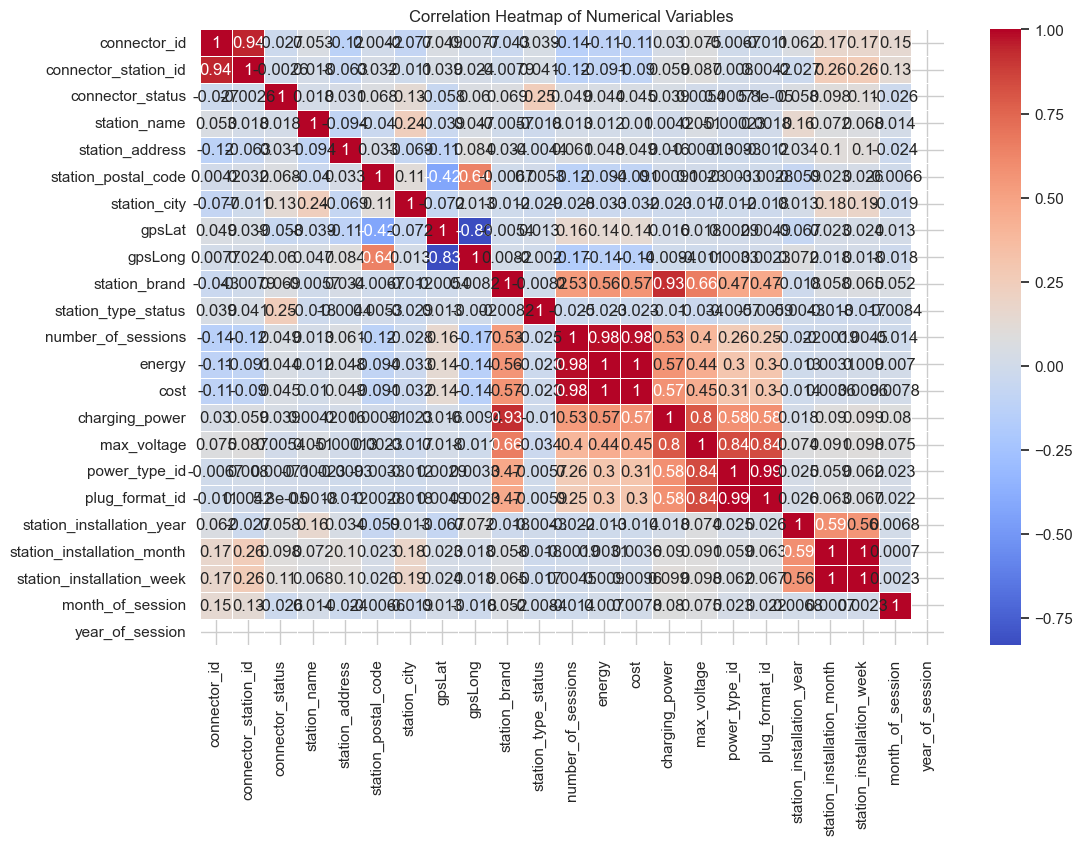

In [138]:
# compute the correlation matrix
correlation_matrix = pdr_locations_cleaned.corr()

# generate a heatmap to visualize the correlation between numerical variables
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

Distribution of total energy consumption

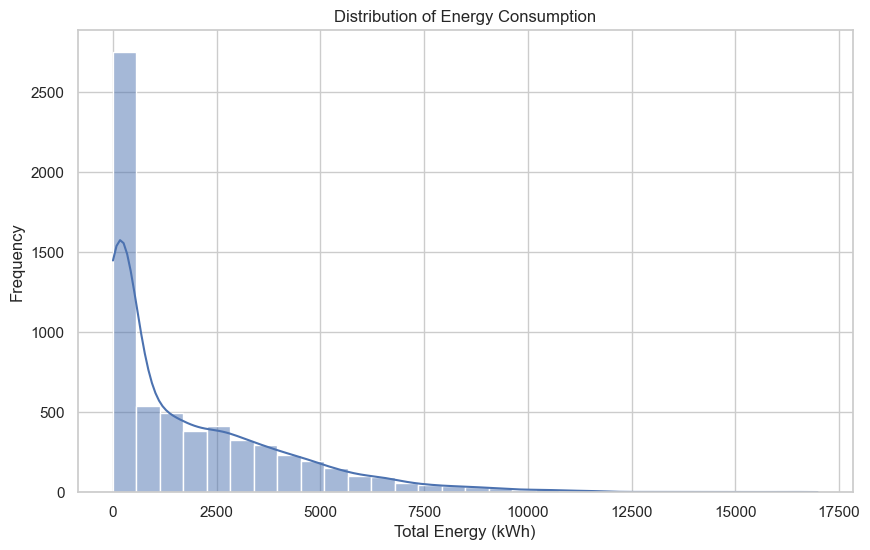

In [142]:
# Plot distribution of total energy consumption
plt.figure(figsize=(10, 6))
sns.histplot(pdr_locations_cleaned['energy'], bins=30, kde=True)
plt.title('Distribution of Energy Consumption')
plt.xlabel('Energy (kWh)')
plt.ylabel('Frequency')
plt.show()

In [319]:
#pdr_locations_cleaned.to_csv('C:\\Users\\Камила\\Big_data\\charging_stations\\dataset\\task_1\\pdr_locations_cleaned_encoded_task1.csv', index=False)

In [143]:
pdr_locations_cleaned.head()

,connector_id,connector_station_id,chargePointIdentity,connector_status,station_name,station_address,station_postal_code,station_city,gpsLat,gpsLong,station_brand,station_type_status,number_of_sessions,energy,cost,charging_power,max_voltage,power_type_id,plug_format_id,plug_type,station_installation_year,station_installation_month,station_installation_week,month_of_session,year_of_session
0,462849,385079,IT*F2X*EF2XITA2151*1,0,9,2,29017,29,44.96266,9.90426,0,0,19,323.547,177.93,62.5,500,3,2,COMBO,2022,4,16,1,2024
1,462849,385079,IT*F2X*EF2XITA2151*1,0,9,2,29017,29,44.96266,9.90426,0,0,14,325.219,178.87,62.5,500,3,2,COMBO,2022,4,16,2,2024
2,462849,385079,IT*F2X*EF2XITA2151*1,0,9,2,29017,29,44.96266,9.90426,0,0,14,287.817,158.31,62.5,500,3,2,COMBO,2022,4,16,3,2024
3,462849,385079,IT*F2X*EF2XITA2151*1,0,9,2,29017,29,44.96266,9.90426,0,0,25,543.858,299.07,62.5,500,3,2,COMBO,2022,4,16,4,2024
4,462849,385079,IT*F2X*EF2XITA2151*1,0,9,2,29017,29,44.96266,9.90426,0,0,27,497.321,273.53,62.5,500,3,2,COMBO,2022,4,16,5,2024


# POIs -Rome

OpenStreetMap (OSM) + OSMX - libraries to extract data - POIs, map boundaries.

In [1]:
pip install geopandas osmnx matplotlib


   ---------------------------------------- 0.0/1.1 MB ? eta -:--:--
   ---------------------------- ----------- 0.8/1.1 MB 4.2 MB/s eta 0:00:01
   ---------------------------------------- 1.1/1.1 MB 4.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/24.5 MB ? eta -:--:--
   -- ------------------------------------- 1.3/24.5 MB 6.1 MB/s eta 0:00:04
   ---- ----------------------------------- 2.6/24.5 MB 6.3 MB/s eta 0:00:04
   ------- -------------------------------- 4.5/24.5 MB 7.1 MB/s eta 0:00:03
   --------- ------------------------------ 5.8/24.5 MB 6.9 MB/s eta 0:00:03
   ------------ --------------------------- 7.9/24.5 MB 7.4 MB/s eta 0:00:03
   --------------- ------------------------ 9.4/24.5 MB 7.8 MB/s eta 0:00:02
   ----------------- ---------------------- 10.7/24.5 MB 7.3 MB/s eta 0:00:02
   -------------------- ------------------- 12.6/24.5 MB 7.4 MB/s eta 0:00:02
   ---------------------- ----------------- 13.9/24.5 MB 7.3 MB/s eta 0:00:02
   ---------


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


C:\Users\Камила\AppData\Local\Temp\ipykernel_11160\1397526133.py:14: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_place(place_name, tags)
C:\Users\Камила\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(


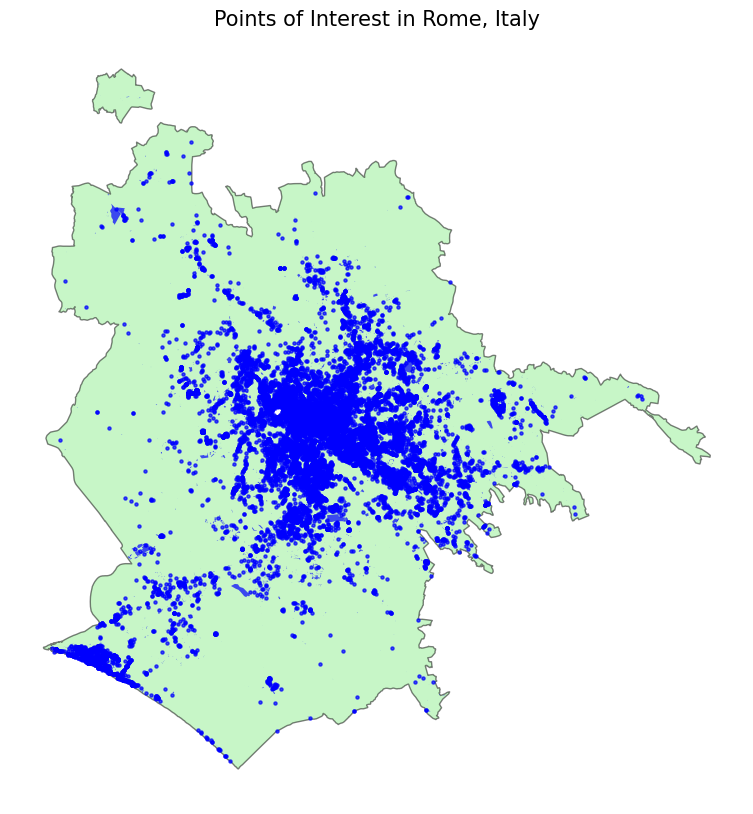

In [2]:
import osmnx as ox
import geopandas as gpd
import matplotlib.pyplot as plt

# Define the location: Rome, Italy
place_name = "Rome, Italy"

# Load the city map of Rome
area = ox.geocode_to_gdf(place_name)

# Get POIs in Rome
# You can specify types of POIs, e.g., restaurants, cafes, schools, etc.
tags = {"amenity": True}  # This will retrieve a broad category of POIs
pois = ox.geometries_from_place(place_name, tags)

# Plotting
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the city boundary
area.plot(ax=ax, color='lightgreen', edgecolor='black', alpha=0.5)

# Plot the POIs
pois.plot(ax=ax, markersize=5, color='blue', alpha=0.7)

# Customize the plot
ax.set_title("Points of Interest in Rome, Italy", fontsize=15)
ax.axis('off')

plt.show()

# Population Density

For Population density distribution, I need Humanitarian Data Exchange + Meta